# Job Market Insights in Canada



## Data Scraping 

## Approach 1

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
import re
positions = []
companies = []
locations = []
posted_dates = []
salaries = []
experiences = []
tasks = []
def scraping_url(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_element = soup.find_all('a', class_ = 'resultJobItem')
        for article in article_element:
            element = article.find('span',class_ ='noctitle')
            # Extract the text from the element
            position = element.contents[0].strip() if element else ''
            linked_url = article.get("href")
            full_linked_url = "https://www.jobbank.gc.ca" + linked_url  # Construct the full URL
            linked_response = requests.get(full_linked_url)
            # Step 4: Parse the linked page
            linked_soup = BeautifulSoup(linked_response.text, "html.parser")
            linked_item = linked_soup.find('div',class_ = 'job-posting-detail-requirements')
            if linked_item:   
                experience = linked_item.find('p', attrs={"property": "experienceRequirements qualification"})
                if experience:
                    experience = experience.text.strip()
                else:
                    experience = "NA"
                responsibilities = linked_item.find('div', attrs = {"property": "responsibilities"})
                if responsibilities:
                    span_tags = responsibilities.find_all('span')
                    # Extract the text inside each <span> tag
                    responsibilities = [span.get_text() for span in span_tags]
                    # Join the extracted responsibilities into a single string
                    responsibilities_text = ', '.join(responsibilities)
                    #task = linked_item.find('ul', class_='csvlist').text.strip()
                else:
                    responsibilities_text = ''.join("NA")
            else:
                experience = "NA"
                
            
            # Find all the <span> tags within the <div> element
            
            box = article.find('ul',class_ = 'list-unstyled')
            dates = box.find('li', class_ = 'date').text.strip()
            company = box.find('li', class_ = 'business').text.strip()
            location_box = box.find('li',class_ = 'location')
            location = location_box.contents[-1].strip() if location_box else ''
            salary = box.find('li', class_ = 'salary').text.strip()
            #Use a regular expression to remove all '\n' and '\t' occurrences
            #print(responsibilities_text)
            #print(task)
            salary = re.sub(r'[\n\t]', '', salary)
            positions.append(position)
            companies.append(company)
            locations.append(location)
            posted_dates.append(dates)
            salaries.append(salary)
            experiences.append(experience)
            tasks.append(responsibilities_text)

In [3]:
base_url = 'https://www.jobbank.gc.ca/jobsearch/jobsearch?searchstring=IT+jobs&locationstring='
page_num = 1

while page_num <=20:
    page_url = f'{base_url}?page={page_num}&sort=M'
    scraping_url(page_url)
    page_num +=1

In [4]:
data = {'position': positions,'company':companies,'location':locations,'posted date':posted_dates,'salaries':salaries,
       'Experience' : experiences,'Responsibilities' : tasks}
data_df = pd.DataFrame(data)
data_df.head(20)

In [5]:
csv_file_path = 'scraped_data_1.csv'
data_df.to_csv(csv_file_path, index=False) 

## Approach 2

In [6]:
# IT Jobs scrapping
import re
positions = []
companies = []
locations = []
posted_dates = []
salaries = []
experiences = []
tasks = []
def scraping_url(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_element = soup.find_all('a', class_ = 'resultJobItem')
        for article in article_element:
            element = article.find('span',class_ ='noctitle')
            # Extract the text from the element
            position = element.contents[0].strip() if element else ''
            linked_url = article.get("href")
            #https://www.jobbank.gc.ca/jobsearch/jobsearch?searchstring=data+analyst&locationstring=Canada
            full_linked_url = "https://www.jobbank.gc.ca" + linked_url  # Construct the full URL
            linked_response = requests.get(full_linked_url)
            # Step 4: Parse the linked page
            linked_soup = BeautifulSoup(linked_response.text, "html.parser")
            linked_item = linked_soup.find('div',class_ = 'job-posting-detail-requirements')
            if linked_item:   
                experience = linked_item.find('p', attrs={"property": "experienceRequirements qualification"})
                if experience:
                    experience = experience.text.strip()
                else:
                    experience = "NA"
                responsibilities = linked_item.find('div', attrs = {"property": "responsibilities"})
                if responsibilities:
                    span_tags = responsibilities.find_all('span')
                    # Extract the text inside each <span> tag
                    responsibilities = [span.get_text() for span in span_tags]
                    # Join the extracted responsibilities into a single string
                    responsibilities_text = ', '.join(responsibilities)
                    #task = linked_item.find('ul', class_='csvlist').text.strip()
                else:
                    responsibilities_text = "NA"
                
            else:
                experience = "NA"
                responsibilities_text = "NA"
                
            
            # Find all the <span> tags within the <div> element
            
            box = article.find('ul',class_ = 'list-unstyled')
            dates = box.find('li', class_ = 'date').text.strip()
            company = box.find('li', class_ = 'business').text.strip()
            location_box = box.find('li',class_ = 'location')
            location = location_box.contents[-1].strip() if location_box else ''
            salary = box.find('li', class_ = 'salary').text.strip()
            #Use a regular expression to remove all '\n' and '\t' occurrences
            #print(responsibilities_text)
            #print(task)
            salary = re.sub(r'[\n\t]', '', salary)
            positions.append(position)
            companies.append(company)
            locations.append(location)
            posted_dates.append(dates)
            salaries.append(salary)
            experiences.append(experience)
            tasks.append(responsibilities_text)

In [7]:
# base_url = 'https://www.jobbank.gc.ca/jobsearch/jobsearch'
# page_num = 1
# #https://www.jobbank.gc.ca/jobsearch/jobsearch&term=data&sort=M&page=1
# while page_num <=185:
#     page_url = f'{base_url}?page={page_num}&sort=M&searchstring=computer'
#    # page_url = f'{base_url}?page={page_num}&sort=M' just replace data with another search string 
#     scraping_url(page_url)
#     page_num +=1

In [8]:
# # Creating dataframe from scarped data
# data = {'position': positions,'company':companies,'location':locations,'posted date':posted_dates,'salaries':salaries,
#        'Experience' : experiences,'Responsibilities' : tasks}
# data_df = pd.DataFrame(data)
# data_df.info()

In [9]:
# csv_file_path = 'scarped_data_2.csv'
# jobbank_df.to_csv(csv_file_path, index=False) 

# Importing required libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('jobbank_data_5.csv')
df2 = pd.read_csv('jobbank_data_4.csv')
df3 = pd.read_csv('jobbankdata_sandip.csv')
df4 = pd.read_csv('jobbankdata_healthcare.csv')
df5 = pd.read_csv('jobbankdata_dataanalyst.csv')
df6 = pd.read_csv('jobbankdata_softwaredeveloper.csv')
df7 = pd.read_csv('jobbankdata_IT.csv')
df8 = pd.read_csv('jobbankdata_computer.csv')
# df9 = pd.read_csv('jobbankdata_sandip4.csv')
jobbank_df=pd.concat([df,df2,df3,df4,df5,df6,df7,df8])
jobbank_df.head(20)

position                             company  \
0   server - food and beverage services          102074337 Saskatchewan Ltd   
1                            bookkeeper              APEX CLEANING SERVICES   
2               clerk, customer service                     Tabor Pizza Ltd   
3                  truck crane operator                    AA Trucking Ltd.   
4                                welder  John & Sons Welding Hydraulics LTD   
5                store manager - retail        S.C.DHILLON ENTERPRISES LTD.   
6                            bookkeeper        S.C.DHILLON ENTERPRISES LTD.   
7                        kitchen helper            Radha Food Industry Ltd.   
8                                  chef        S.C.DHILLON ENTERPRISES LTD.   
9                        kitchen helper        S.C.DHILLON ENTERPRISES LTD.   
10                  manager, restaurant        S.C.DHILLON ENTERPRISES LTD.   
11                              cleaner        S.C.DHILLON ENTERPRISES LTD.   
12  server - food and beverage services        S.C.DHILLON ENTERPRISES LTD.   
13               food counter attendant        S.C.DHILLON ENTERPRISES LTD.   
14                           pizza cook        S.C.DHILLON ENTERPRISES LTD.   
15           delivery driver, fast food        S.C.DHILLON ENTERPRISES LTD.   
16                           dishwasher        S.C.DHILLON ENTERPRISES LTD.   
17                       assistant cook        S.C.DHILLON ENTERPRISES LTD.   
18             administrative assistant        S.C.DHILLON ENTERPRISES LTD.   
19             administrative assistant            Guardteck Security Corp.   

              location       posted date              salaries  \
0       Moose Jaw (SK)  October 28, 2023  Salary:$14.00 hourly   
1        Smithers (BC)  October 28, 2023  Salary:$25.00 hourly   
2   Prince George (BC)  October 28, 2023  Salary:$16.75 hourly   
3          Surrey (BC)  October 28, 2023  Salary:$35.75 hourly   
4        Oakville (ON)  October 28, 2023  Salary:$25.00 hourly   
5          Surrey (BC)  October 28, 2023  Salary:$30.00 hourly   
6          Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
7       Courtenay (BC)  October 28, 2023  Salary:$20.00 hourly   
8          Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
9          Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
10         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
11         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
12         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
13         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
14         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
15         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
16         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
17         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
18         Surrey (BC)  October 28, 2023  Salary:$27.50 hourly   
19        Burnaby (BC)  October 28, 2023  Salary:$25.00 hourly   

                      Experience  \
0    1 year to less than 2 years   
1   2 years to less than 3 years   
2                     Will train   
3   2 years to less than 3 years   
4    1 year to less than 2 years   
5   2 years to less than 3 years   
6   2 years to less than 3 years   
7                     Will train   
8   2 years to less than 3 years   
9                     Will train   
10  2 years to less than 3 years   
11  2 years to less than 3 years   
12  2 years to less than 3 years   
13  2 years to less than 3 years   
14  2 years to less than 3 years   
15   1 year to less than 2 years   
16                    Will train   
17  2 years to less than 3 years   
18   1 year to less than 2 years   
19                    Will train   

                                     Responsibilities  
0                                                 NaN  
1                                                 NaN  
2   Receive payments, Operate cash register, Greet...  
3  

# Data Wrangling

## 1.  DISCOVERING the dataset

In [12]:
jobbank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27943 entries, 0 to 3449
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          27943 non-null  object
 1   company           27942 non-null  object
 2   location          27852 non-null  object
 3   posted date       27943 non-null  object
 4   salaries          27943 non-null  object
 5   Experience        22670 non-null  object
 6   Responsibilities  20946 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


#### Dataset Shape: 25899 rows and 7 columns

In [13]:
# Checking the shape of the dataset
jobbank_df.shape

(27943, 7)

#### Null Values: 
'company' column has 1 null value,'location' columns has  62 null values,'Experience' column has 3353 null values and 'Responsibilities' column has 5070 null values

In [14]:
# Checking the null values in all the columns of the dataset
jobbank_df.isnull().sum()

position               0
company                1
location              91
posted date            0
salaries               0
Experience          5273
Responsibilities    6997
dtype: int64

#### Duplicate records: 12440

In [15]:
# Finding out the duplicate records in the dataset
jobbank_df.duplicated().sum()

12767

In [16]:
csv_file_path = '12767 rows jobbank.csv'
jobbank_df.to_csv(csv_file_path, index=False) 

In [17]:
# Checking all the columns of the dataset
jobbank_df.columns

Index(['position', 'company', 'location', 'posted date', 'salaries',
       'Experience', 'Responsibilities'],
      dtype='object')

In [18]:
jobbank_df['position'].value_counts()
#pd.set_option('display.max_rows', None)

software developer                                          1290
food service supervisor                                     1229
cook                                                        1041
administrative assistant                                     805
bookkeeper                                                   574
                                                            ... 
cabinetmakers foreman/woman                                    1
chicken catcher                                                1
bus boy/girl                                                   1
supervisor, travel clerks                                      1
engineering technologist - electrical power distribution       1
Name: position, Length: 2635, dtype: int64

In [19]:
jobbank_df.iloc[2]['Responsibilities']

'Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease'

**Checking datatypes**

In [20]:
jobbank_df.dtypes

position            object
company             object
location            object
posted date         object
salaries            object
Experience          object
Responsibilities    object
dtype: object

## 2. CLEANING the dataset

### Handling Duplicate Values: Approach
* We will drop all the duplicate records

In [21]:
jobbank_df.duplicated().sum()

12767

In [22]:
# Dropping all the duplicates in the dataframe
jobbank_df.drop_duplicates(inplace=True)


In [23]:
jobbank_df.duplicated().sum()

0

### Handling Null Values: Approach
* Will handle null values for each column seperately

In [24]:
jobbank_df.isnull().sum()

position               0
company                1
location              53
posted date            0
salaries               0
Experience          3435
Responsibilities    4313
dtype: int64

#### Handling missing values in 'Experience' column

In [25]:
# filling all the null values in Experience column with 0
jobbank_df['Experience'].fillna('0', inplace=True)


In [26]:
jobbank_df['Experience'].isnull().sum()

0

#### Handling missing values in 'location' column

In [27]:
jobbank_df[jobbank_df['location'].isnull()==True]

position  \
11                        retail sales representative   
101                           registered nurse (R.N.)   
204                           registered nurse (R.N.)   
262            personal support worker - home support   
270                 licensed practical nurse (L.P.N.)   
289                          customer service adviser   
363                                nurse practitioner   
478                           registered nurse (R.N.)   
516                           registered nurse (R.N.)   
581                                  data entry clerk   
656                   commercial construction manager   
905                                nurse practitioner   
995            data analyst - informatics and systems   
1073                                     psychologist   
1353                                       pharmacist   
1359                              clinical pharmacist   
1499               project co-ordinator, construction   
1807                               nurse practitioner   
1843                          advanced care paramedic   
2019              registered practical nurse (R.P.N.)   
49                                     data scientist   
284            data analyst - informatics and systems   
626                      manager, information systems   
640   information technology (IT) development manager   
683                      manager, information systems   
777                      manager, information systems   
107                                software developer   
421                                software developer   
436                                software developer   
461                                 software engineer   
549                                software developer   
849                                software developer   
897                                software developer   
1012                               software developer   
1156                               software developer   
1157                               software developer   
1158                               software developer   
1173                                software engineer   
1201                               software developer   
1248                               software developer   
1393                                software engineer   
1577                    systems applications engineer   
409                   informatics security consultant   
681                              help desk technician   
1020                          user support technician   
747                               computer programmer   
913                       CNC machining tool operator   
2568                   technical sales representative   
2650                       videoconference technician   
2679                       videoconference technician   
2939      customer support representative - wholesale   
3152                               programmer analyst   
3421                               grain merchandiser   

                                              company location  \
11                      WELL Health Technologies Corp      NaN   
101       Express Healthcare Professionals - Red Deer      NaN   
204                              Canadian Health Labs      NaN   
262                              Canadian Health Labs      NaN   
270                              Canadian Health Labs      NaN   
289                                   Cardinal Health      NaN   
363                              Canadian Health Labs      NaN   
478                              Canadian Health Labs      NaN   
516                              Canadian Health Labs      NaN   
581                                   Cardinal Health      NaN   
656                              GTR Worldwide Canada      NaN   
905                                           Fonemed      NaN   
995                                            Nortal      NaN   
1073                                      

In [28]:
# Replacing all the null values in location column with 'remote'
jobbank_df['location'].fillna('remote', inplace=True)


In [29]:
jobbank_df['location'].isnull().sum()

0

#### Handling missing values in 'company' column

In [30]:
jobbank_df[jobbank_df['company'].isnull()==True]

position company       location       posted date  \
613  family caregiver     NaN  Edmonton (AB)  October 30, 2023   

                 salaries  Experience  \
613  Salary:$18.00 hourly  Will train   

                                      Responsibilities  
613  Administer medications, Assist in regular exer...

In [31]:
# Dropping the 1 null value in company column
jobbank_df.dropna(inplace=True)

In [32]:
jobbank_df['company'].isnull().sum()

0

#### Handling missing values in 'Responsibilities' column
* We will not handle null values in Responsibilities column because we are not using that column in this project


## 2. STRUCTURING the dataset

## Preprocessing salaries column

In [33]:
# Filtering all the records where salaries column conatin the 'hourly' keyword
filtered_hourly_df = jobbank_df[jobbank_df['salaries'].str.contains('hourly', case=False, na=False)]


In [34]:
filtered_hourly_df.shape

(10360, 7)

In [35]:
# Filtering all the records where salaries column  does not conatin the 'hourly' keyword that would be yearly salary
filtered_yearly_df = jobbank_df[~jobbank_df['salaries'].str.contains('hourly', case=False, na=False)]

In [36]:
filtered_yearly_df

position  \
40                                    software engineer   
49       information technology (IT) support technician   
102                            assistant manager, hotel   
172                                           head chef   
195                        restaurant assistant manager   
...                                                 ...   
3378                                automotive mechanic   
3392                         director, community centre   
3395                       business development officer   
3435  engineering technologist - electrical power di...   
3436                     corporate sales representative   

                                               company            location  \
40                                    Vertogic IT Inc.        Burnaby (BC)   
49                             Pearl Technologies LTD.        Toronto (ON)   
102                         Northern Rockies Lodge Ltd    Muncho Lake (BC)   
172                                     Beirut Express    Fredericton (NB)   
195                          Eleven Foods Incorporated       Listowel (ON)   
...                                                ...                 ...   
3378  Thornhill Precision Automotive and Autobody Inc.      Thornhill (ON)   
3392              Maple Grove Christian Retreat Centre     Thamesford (ON)   
3395                                         SNDL Inc.        Toronto (ON)   
3435                                mtls aerostructure  Saint-Laurent (QC)   
3436                                     Services Plus       Rimouski (QC)   

             posted date                                           salaries  \
40      October 28, 2023  Salary:$90,000.00 to $100,000.00 annually (to ...   
49      October 28, 2023                         Salary:$60,000.00 annually   
102     October 28, 2023  Salary:$4,000.00 to $4,500.00 monthly (to be n...   
172     October 28, 2023                         Salary:$60,000.00 annually   
195     October 28, 2023                         Salary:$46,500.00 annually   
...                  ...                                                ...   
3378   November 02, 2023  Salary:$50,000.00 to $80,000.00 annually (to b...   
3392   November 02, 2023                         Salary:$80,000.00 annually   
3395   November 02, 2023  Salary:$240,000.00 to $280,000.00 annually (to...   
3435  September 28, 2023  Salary:$70,000.00 to $80,000.00 annually (to b...   
3436  September 28, 2023                         Salary:$50,000.00 annually   

                        Experience  \
40                 5 years or more   
49         1 to less than 7 months   
102   3 years to less than 5 years   
172   2 years to less than 3 years   
195    1 year to less than 2 years   
...                            ...   
3378  3 years to less than 5 years   
3392  3 years to less than 5 years   
3395               5 years or more   
3435  3 years to less than 5 years   
3436   1 year to less than 2 years   

                                       Responsibilities  
40    Research, evaluate and synthesize technical in...  
49    Communicate electronically and in person with ...  
102   Develop and implement policies and procedures ...  
172   Maintain records of food costs, consumption, s...  
195   Plan, organize, direct, control and evaluate d...  
...                                                 ...  
3378  Inspect motor in operation, road test motor ve...  
3392  Hire and provide training for professional and...  
3395  Develop policies, Develop portfolio of marketi...  
3435  Assist in design, development and testing, Ass...  
3436  Greet customers and discuss type, quality and ...  

[502 rows x 7 columns]

In [37]:
filtered_yearly_df.shape

(502, 7)

#### Algorithm to process salaries column:

* In filtered hourly df , we have hourly salary of employee, we will now convert that to annualy by assuming 40 hours per week and 52 weeks in a year.
* First we will remove text from salary column and include only numbers


In [38]:
filtered_hourly_df['salaries']

2                                    Salary:$16.75 hourly
3                                    Salary:$35.75 hourly
4                                    Salary:$25.00 hourly
5                                    Salary:$30.00 hourly
6                                    Salary:$27.50 hourly
                              ...                        
3419                                 Salary:$47.96 hourly
3422                                 Salary:$20.00 hourly
3432                                 Salary:$30.00 hourly
3433    Salary:$25.00 to $33.00 hourly (to be negotiated)
3434                                 Salary:$23.98 hourly
Name: salaries, Length: 10360, dtype: object

**Converting hourly salary to annual salary by extracting digits, taking median from range**

In [39]:
# Define a function to extract and convert the hourly rate or calculate the median for a range
import re
def extract_hourly_rate(salary_string):
    # Check for a range pattern at the end of the string
    range_match = re.search(r'\$\d+\.\d+ to \$\d+\.\d+', salary_string)
    if range_match:
        values = [float(match.group()[1:]) for match in re.finditer(r'\$\d+\.\d+', range_match.group())]
        median_value = sum(values) / len(values)
        median_annual_salary = median_value*40*52
        return median_annual_salary
    
    # Check for an individual value
    match = re.search(r'\$\d+\.\d+', salary_string)
    if match:
        salary = float(match.group()[1:])  # Extract and convert the hourly rate
        annual_salary = salary*40*52
        return annual_salary

    # If neither pattern matches, return None
    return None

# Apply the function to the 'salary' column to replace the strings with numerical values or medians
filtered_hourly_df['salaries'] = filtered_hourly_df['salaries'].apply(extract_hourly_rate)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6488\3148654645.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_df['salaries'] = filtered_hourly_df['salaries'].apply(extract_hourly_rate)


In [40]:
filtered_hourly_df['salaries'].shape

(10360,)

In [41]:
filtered_yearly_df

position  \
40                                    software engineer   
49       information technology (IT) support technician   
102                            assistant manager, hotel   
172                                           head chef   
195                        restaurant assistant manager   
...                                                 ...   
3378                                automotive mechanic   
3392                         director, community centre   
3395                       business development officer   
3435  engineering technologist - electrical power di...   
3436                     corporate sales representative   

                                               company            location  \
40                                    Vertogic IT Inc.        Burnaby (BC)   
49                             Pearl Technologies LTD.        Toronto (ON)   
102                         Northern Rockies Lodge Ltd    Muncho Lake (BC)   
172                                     Beirut Express    Fredericton (NB)   
195                          Eleven Foods Incorporated       Listowel (ON)   
...                                                ...                 ...   
3378  Thornhill Precision Automotive and Autobody Inc.      Thornhill (ON)   
3392              Maple Grove Christian Retreat Centre     Thamesford (ON)   
3395                                         SNDL Inc.        Toronto (ON)   
3435                                mtls aerostructure  Saint-Laurent (QC)   
3436                                     Services Plus       Rimouski (QC)   

             posted date                                           salaries  \
40      October 28, 2023  Salary:$90,000.00 to $100,000.00 annually (to ...   
49      October 28, 2023                         Salary:$60,000.00 annually   
102     October 28, 2023  Salary:$4,000.00 to $4,500.00 monthly (to be n...   
172     October 28, 2023                         Salary:$60,000.00 annually   
195     October 28, 2023                         Salary:$46,500.00 annually   
...                  ...                                                ...   
3378   November 02, 2023  Salary:$50,000.00 to $80,000.00 annually (to b...   
3392   November 02, 2023                         Salary:$80,000.00 annually   
3395   November 02, 2023  Salary:$240,000.00 to $280,000.00 annually (to...   
3435  September 28, 2023  Salary:$70,000.00 to $80,000.00 annually (to b...   
3436  September 28, 2023                         Salary:$50,000.00 annually   

                        Experience  \
40                 5 years or more   
49         1 to less than 7 months   
102   3 years to less than 5 years   
172   2 years to less than 3 years   
195    1 year to less than 2 years   
...                            ...   
3378  3 years to less than 5 years   
3392  3 years to less than 5 years   
3395               5 years or more   
3435  3 years to less than 5 years   
3436   1 year to less than 2 years   

                                       Responsibilities  
40    Research, evaluate and synthesize technical in...  
49    Communicate electronically and in person with ...  
102   Develop and implement policies and procedures ...  
172   Maintain records of food costs, consumption, s...  
195   Plan, organize, direct, control and evaluate d...  
...                                                 ...  
3378  Inspect motor in operation, road test motor ve...  
3392  Hire and provide training for professional and...  
3395  Develop policies, Develop portfolio of marketi...  
3435  Assist in design, development and testing, Ass...  
3436  Greet customers and discuss type, quality and ...  

[502 rows x 7 columns]

* Extracting digits from annual salary and taking median from range

In [42]:
filtered_yearly_df.shape

(502, 7)

In [43]:
filtered_annual_df = filtered_yearly_df[filtered_yearly_df['salaries'].str.contains('annually', case=False, na=False)]

In [44]:
filtered_annual_df['salaries']

40      Salary:$90,000.00 to $100,000.00 annually (to ...
49                             Salary:$60,000.00 annually
172                            Salary:$60,000.00 annually
195                            Salary:$46,500.00 annually
274                            Salary:$97,760.00 annually
                              ...                        
3378    Salary:$50,000.00 to $80,000.00 annually (to b...
3392                           Salary:$80,000.00 annually
3395    Salary:$240,000.00 to $280,000.00 annually (to...
3435    Salary:$70,000.00 to $80,000.00 annually (to b...
3436                           Salary:$50,000.00 annually
Name: salaries, Length: 449, dtype: object

* We can see that there are some monthly salaries too, lets filter them

In [45]:
filtered_monthly_df = jobbank_df[jobbank_df['salaries'].str.contains('monthly', case=False, na=False)]

In [46]:
filtered_monthly_df.shape

(20, 7)

**filtered_annual_df is our actual annualy salary df**

In [47]:
def extract_annual_rate(salary_string):
    # Check for a range pattern at the end of the string
        range_pattern = r'\$[\d,]+\.\d{2}\s+to\s+\$[\d,]+\.\d{2}'

        # Use re.search to find the pattern in the string
        range_match = re.search(range_pattern, salary_string)
        if range_match:
            # Extract the lower and upper values
            values = [float(match.replace('$', '').replace(',', '')) for match in re.findall(r'\$[\d,]+\.\d{2}', range_match.group())]

            # Calculate the median
            if values:
                median_value = sum(values) / len(values)
                return median_value

        # Check for an individual value
        match = re.search(r'\$[\d,]+\d', salary_string)
        if match:
            salary_with_commas = match.group()
            salary = float(salary_with_commas.replace('$', '').replace(',', ''))
            return salary

        # If neither pattern matches, return None
        return None

# Apply the function to the 'salary' column to replace the strings with numerical values or medians
filtered_annual_df['salaries'] = filtered_annual_df['salaries'].apply(extract_annual_rate)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6488\1804944788.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_annual_df['salaries'] = filtered_annual_df['salaries'].apply(extract_annual_rate)


In [48]:
filtered_annual_df.shape

(449, 7)

In [49]:
filtered_hourly_df.shape

(10360, 7)

#### Concatenating filtered_hourly_df and filtered_annual_df to create one dataframe having annual salaries

In [50]:
combined_job_df = pd.concat([filtered_hourly_df,filtered_annual_df])

In [51]:
combined_job_df

position  \
2                               clerk, customer service   
3                                  truck crane operator   
4                                                welder   
5                                store manager - retail   
6                                            bookkeeper   
...                                                 ...   
3378                                automotive mechanic   
3392                         director, community centre   
3395                       business development officer   
3435  engineering technologist - electrical power di...   
3436                     corporate sales representative   

                                               company            location  \
2                                      Tabor Pizza Ltd  Prince George (BC)   
3                                     AA Trucking Ltd.         Surrey (BC)   
4                   John & Sons Welding Hydraulics LTD       Oakville (ON)   
5                         S.C.DHILLON ENTERPRISES LTD.         Surrey (BC)   
6                         S.C.DHILLON ENTERPRISES LTD.         Surrey (BC)   
...                                                ...                 ...   
3378  Thornhill Precision Automotive and Autobody Inc.      Thornhill (ON)   
3392              Maple Grove Christian Retreat Centre     Thamesford (ON)   
3395                                         SNDL Inc.        Toronto (ON)   
3435                                mtls aerostructure  Saint-Laurent (QC)   
3436                                     Services Plus       Rimouski (QC)   

             posted date  salaries                    Experience  \
2       October 28, 2023   34840.0                    Will train   
3       October 28, 2023   74360.0  2 years to less than 3 years   
4       October 28, 2023   52000.0   1 year to less than 2 years   
5       October 28, 2023   62400.0  2 years to less than 3 years   
6       October 28, 2023   57200.0  2 years to less than 3 years   
...                  ...       ...                           ...   
3378   November 02, 2023   65000.0  3 years to less than 5 years   
3392   November 02, 2023   80000.0  3 years to less than 5 years   
3395   November 02, 2023  260000.0               5 years or more   
3435  September 28, 2023   75000.0  3 years to less than 5 years   
3436  September 28, 2023   50000.0   1 year to less than 2 years   

                                       Responsibilities  
2     Receive payments, Operate cash register, Greet...  
3     Operate mobile and tower cranes to lift, move,...  
4     Read and interpret welding blueprints, drawing...  
5     Manage staff and assign duties, Determine merc...  
6     Calculate and prepare cheques for payroll, Cal...  
...                                                 ...  
3378  Inspect motor in operation, road test motor ve...  
3392  Hire and provide training for professional and...  
3395  Develop policies, Develop portfolio of marketi...  
3435  Assist in design, development and testing, Ass...  
3436  Greet customers and discuss type, quality and ...  

[10809 rows x 7 columns]

In [52]:
# checking shape of dataframe
combined_job_df.shape

(10809, 7)

In [53]:
# Exploring the dataframe
combined_job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10809 entries, 2 to 3436
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          10809 non-null  object 
 1   company           10809 non-null  object 
 2   location          10809 non-null  object 
 3   posted date       10809 non-null  object 
 4   salaries          10809 non-null  float64
 5   Experience        10809 non-null  object 
 6   Responsibilities  10809 non-null  object 
dtypes: float64(1), object(6)
memory usage: 675.6+ KB


## Preprocessing Posted date

In [54]:
# Exploring 'posted date' column top 5 records
combined_job_df['posted date'].head()

2    October 28, 2023
3    October 28, 2023
4    October 28, 2023
5    October 28, 2023
6    October 28, 2023
Name: posted date, dtype: object

In [55]:
# Converting 'posted date' to datetime format
combined_job_df['posted date'] = pd.to_datetime(combined_job_df['posted date'])

# Display the modified DataFrame
combined_job_df.head()

position                             company  \
2  clerk, customer service                     Tabor Pizza Ltd   
3     truck crane operator                    AA Trucking Ltd.   
4                   welder  John & Sons Welding Hydraulics LTD   
5   store manager - retail        S.C.DHILLON ENTERPRISES LTD.   
6               bookkeeper        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                    Responsibilities  
2  Receive payments, Operate cash register, Greet...  
3  Operate mobile and tower cranes to lift, move,...  
4  Read and interpret welding blueprints, drawing...  
5  Manage staff and assign duties, Determine merc...  
6  Calculate and prepare cheques for payroll, Cal...

## Processing Responsibilities Column: Work in Progress

In [56]:
list(combined_job_df['Responsibilities'].head())

['Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease',
 'Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work',
 'Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications',
 'Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers',
 'Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establ

# 4 .ENRICHING the datset : Feature engineering

## Preprocessing Experience Column : Creating Minimum Experience and Maximum Experience Column

In [57]:
# Exploring the first five records of 'Experience' column
combined_job_df['Experience'].head()

2                      Will train
3    2 years to less than 3 years
4     1 year to less than 2 years
5    2 years to less than 3 years
6    2 years to less than 3 years
Name: Experience, dtype: object

In [58]:
# Checking the unique values in 'Experience' column
combined_job_df['Experience'].unique()

array(['Will train', '2 years to less than 3 years',
       '1 year to less than 2 years', '3 years to less than 5 years',
       '1 to less than 7 months', '7 months to less than 1 year',
       'Experience an asset', '5 years or more', '0'], dtype=object)

### Function to extract numeric values from 'Experience' column and adding smaller digit to 'Minimum Experience' column and bigger one to 'Maximum Experience'

In [59]:
# Function to parse experience values
def parse_experience(experience):
    if pd.isna(experience) or 'will train' in experience.lower() or 'experience an asset' in experience.lower():
        return 0, 0

    # Extract numeric values
    exp_values = [int(value) if value.isdigit() else 0 for value in experience.split() if value.replace('.', '').isdigit()]

    if not exp_values:
        return np.nan, np.nan

    # If only 1 digit is present, add it to minimum experience and keep maximum experience as nan
    if len(exp_values) == 1:
        return exp_values[0], np.nan

    min_exp, max_exp = exp_values
    if 'year' in experience:
        if 'month' in experience:
            # If both years and months are present, convert months to years    
            min_exp=min_exp/12    

        return min_exp, max_exp
    elif 'month' in experience:
        # If only months are present, convert to years
        return min_exp / 12, max_exp / 12
    else:
        # If no indicator is present, assume years
        return min_exp, max_exp

# Apply the function to create new columns
combined_job_df[['Minimum Experience', 'Maximum Experience']] = combined_job_df['Experience'].apply(parse_experience).apply(pd.Series)

# Display the modified DataFrame
print(combined_job_df)


                                               position  \
2                               clerk, customer service   
3                                  truck crane operator   
4                                                welder   
5                                store manager - retail   
6                                            bookkeeper   
...                                                 ...   
3378                                automotive mechanic   
3392                         director, community centre   
3395                       business development officer   
3435  engineering technologist - electrical power di...   
3436                     corporate sales representative   

                                               company            location  \
2                                      Tabor Pizza Ltd  Prince George (BC)   
3                                     AA Trucking Ltd.         Surrey (BC)   
4                   John & Sons Welding Hydraulics LTD   

In [60]:
# Exploring the top 5 records of new dataframe
combined_job_df.head()

position                             company  \
2  clerk, customer service                     Tabor Pizza Ltd   
3     truck crane operator                    AA Trucking Ltd.   
4                   welder  John & Sons Welding Hydraulics LTD   
5   store manager - retail        S.C.DHILLON ENTERPRISES LTD.   
6               bookkeeper        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                    Responsibilities  Minimum Experience  \
2  Receive payments, Operate cash register, Greet...                 0.0   
3  Operate mobile and tower cranes to lift, move,...                 2.0   
4  Read and interpret welding blueprints, drawing...                 1.0   
5  Manage staff and assign duties, Determine merc...                 2.0   
6  Calculate and prepare cheques for payroll, Cal...                 2.0   

   Maximum Experience  
2                 0.0  
3                 3.0  
4                 2.0  
5                 3.0  
6                 3.0

In [61]:
# Checking the rows if any where minimum experience is more than maximum experience
min_more_rows=combined_job_df.loc[combined_job_df['Minimum Experience']>combined_job_df['Maximum Experience']]
min_more_rows.shape

(0, 9)

## Creating a new 'Category' column by processing the position column

In [62]:
# Set options to display full DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [63]:
# Printing all the unique values of position column
for i in combined_job_df['position'].unique():
    print(i)

clerk, customer service
truck crane operator
welder
store manager - retail
bookkeeper
kitchen helper
chef
manager, restaurant
cleaner
server - food and beverage services
food counter attendant
pizza cook
delivery driver, fast food
dishwasher
assistant cook
administrative assistant
financial manager
office manager
warehouse manager
security guard supervisor
manufacturing manager
CAD operator
CNC (computer numerical control) machinist
purchasing manager
Web designer
long haul truck driver
hand dollmaker
carpenter supervisor
delivery driver
cleaning supervisor
business development officer
carpenter
business systems analyst
cook
construction worker
garment alterationist
office administrator
forklift operator
customer service representative supervisor
product manager
customer service supervisor - housing construction
administrative officer
car mechanic
drywall installer and finisher
construction labourer
cashier
marketing specialist
automotive service technician
food service supervisor
pain

#### Applying NLTK techniques to preprocess position column
**Steps Involved**
* Tokenization
* Removing stop words
* Lemmatization
* Frequency Distribution 

In [64]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Drop rows with missing values in 'position' column
combined_job_df = combined_job_df.dropna(subset=['position'])

# Tokenize the text and remove punctuation
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: word_tokenize(str(x)))
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: [word.lower() for word in x if word.isalpha()])

# Remove stop words
stop_words = set(stopwords.words('english'))
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: [word for word in x if word not in stop_words])

# # Lemmatization

lemmatizer = WordNetLemmatizer()
combined_job_df['position'] = combined_job_df['position'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Flatten the list of lists to a single list of words
all_words = [word for sublist in combined_job_df['position'].tolist() for word in sublist]

# Calculate the frequency distribution
fdist = FreqDist(all_words)

# Display the most common words
print(fdist.most_common())


[('supervisor', 1377), ('service', 1303), ('food', 1024), ('manager', 921), ('assistant', 718), ('technician', 703), ('cook', 669), ('administrative', 558), ('software', 506), ('business', 494), ('helper', 457), ('retail', 432), ('financial', 421), ('support', 417), ('general', 377), ('office', 376), ('construction', 371), ('communication', 370), ('computer', 337), ('truck', 325), ('driver', 305), ('sale', 296), ('bookkeeper', 290), ('system', 266), ('attendant', 264), ('store', 261), ('restaurant', 260), ('developer', 260), ('worker', 255), ('administrator', 247), ('analyst', 233), ('engineer', 225), ('kitchen', 214), ('network', 214), ('counter', 207), ('officer', 204), ('labourer', 177), ('carpenter', 175), ('user', 175), ('home', 172), ('care', 155), ('mechanic', 153), ('operator', 144), ('clerk', 138), ('cleaner', 138), ('technical', 134), ('haul', 127), ('long', 125), ('cashier', 125), ('information', 122), ('cnc', 121), ('control', 117), ('installer', 115), ('marketing', 110), (

In [65]:
combined_job_df.head()


position                             company  \
2  [clerk, customer, service]                     Tabor Pizza Ltd   
3    [truck, crane, operator]                    AA Trucking Ltd.   
4                    [welder]  John & Sons Welding Hydraulics LTD   
5    [store, manager, retail]        S.C.DHILLON ENTERPRISES LTD.   
6                [bookkeeper]        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                   Responsibilities  \
2                                                                                                                                                                                                                                                                   Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease   
3                                                                                                                                                                                                                                                                            Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work   
4                                                                                                                                                                                                                                                                    Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications   
5                        Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers   
6  Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establish, maintain and balance various accounts using manual and computerized bookkeeping systems, Maintain general ledgers and financial statements, Post journal entries, Prepare other statistical, financial and accounting reports, Prepare tax returns, Prepare trial balance of books, Reconcile accounts   

   Minimum Experience  Maximum Experience  
2                 0.0                 0.0  
3                 2.0                 3.0  
4                 1.0                 2.0  
5                 2.0                 3.0  
6                 2.0                 3.0

#### Creating different categories from the position column

In [66]:
# Creating a dictionary to extract categories based on words present in the list
category_words = {
   'Management': ['manager', 'director', 'executive', 'coordinator',  'chief', 'administrator', 'officer', 'president', 'vice president', 'boss', 'administrator', 'controller', 'superintendent', 'organizer', 'chairman', 'executive director', 'managing director', 'general manager', 'operations manager', 'team lead', 'senior manager', 'business development manager', 'department head', 'project manager', 'program manager', 'office manager', 'store manager', 'division manager', 'area manager', 'regional manager', 'plant manager', 'branch manager', 'director of operations', 'director of administration', 'director of management', 'executive officer', 'chief executive officer', 'chief operating officer', 'chief financial officer', 'chief information officer'],
    
    'Cooking/Food Services': ['cook', 'chef', 'waiter', 'bartender', 'barista', 'server', 'sous chef', 'line cook', 'pastry chef', 'head chef', 'food', 'caterer', 'kitchen', 'culinary', 'dishwasher', 'food prep', 'catering', 'banquet', 'line chef', 'short-order cook', 'grill cook', 'prep cook', 'head cook', 'food and beverage', 'kitchen supervisor', 'restaurant manager', 'front of house', 'back of house', 'fast food', 'canteen', 'cafeteria', 'food handler', 'bar manager', 'wine steward', 'bar supervisor', 'beer server', 'bar back', 'bar porter', 'mixologist', 'drink mixer', 'head bartender', 'bar captain', 'bar manager', 'restaurant server', 'dining server', 'service staff', 'beverage server', 'restaurant staff', 'catering staff'],
    
    'Administrative': ['assistant', 'clerk', 'secretary', 'receptionist', 'coordinator', 'administrator', 'office manager', 'executive assistant', 'personal assistant', 'office assistant', 'front desk', 'administrative assistant', 'data entry', 'file clerk', 'office coordinator', 'office clerk', 'mail clerk', 'office support', 'office administrator', 'office specialist', 'office services', 'administrative coordinator', 'administrative support', 'office support specialist', 'office operations', 'office management', 'administrative specialist', 'administrative support specialist', 'office support staff', 'office management specialist', 'executive administrative assistant', 'administrative services', 'administrative office manager', 'office administrative specialist', 'front office manager', 'office supervisor', 'office coordinator', 'administrative officer', 'administrative analyst', 'office analyst', 'office planner', 'administrative planner', 'office director'],
    
    'Driving': ['driver', 'chauffeur', 'courier', 'delivery', 'truck', 'bus', 'van driver', 'shuttle driver', 'limousine driver', 'transportation', 'route driver', 'package', 'delivery', 'fleet driver', 'transport driver', 'delivery driver', 'route sales driver', 'route sales representative', 'delivery route driver', 'courier driver', 'taxi driver', 'ride-share driver', 'ride-hailing driver', 'school bus driver', 'charter bus driver', 'garbage truck driver', 'dump truck driver', 'box truck driver', 'limo driver', 'shuttle bus driver', 'transit bus driver', 'passenger bus driver', 'motorcoach driver', 'cab driver', 'taxi operator', 'truck operator', 'van operator', 'bus operator', 'limo operator', 'shuttle operator', 'delivery route operator', 'courier operator', 'route sales operator', 'ride-share operator', 'taxi cab operator'],
    
    'Construction': ['builder', 'construction', 'laborer', 'foreman', 'contractor', 'carpenter', 'mason', 'plumber', 'electrician', 'roofer', 'painter', 'concrete worker', 'heavy equipment operator', 'excavator', 'bulldozer operator', 'backhoe operator', 'crane operator', 'scaffolder', 'welder', 'ironworker', 'pipefitter', 'steamfitter', 'sheet metal worker', 'construction manager', 'construction supervisor', 'construction superintendent', 'project manager construction', 'construction foreman', 'site supervisor', 'building inspector', 'construction consultant', 'construction estimator', 'construction engineer', 'construction safety officer', 'construction quality control', 'construction materials tester', 'construction scheduler', 'construction administrator', 'construction analyst', 'construction coordinator', 'construction planner', 'construction designer', 'construction drafter', 'construction surveyor', 'construction technician'],
    
    'Retail': ['sales', 'cashier', 'retail', 'associate', 'clerk',  'retail sales', 'customer service', 'store clerk', 'store associate', 'retail clerk', 'cashier sales associate', 'cashier clerk', 'front end cashier', 'back end cashier', 'cashier manager', 'customer service representative', 'customer service associate', 'sales clerk', 'sales representative', 'salesperson', 'sales consultant', 'sales specialist', 'sales coordinator', 'sales manager', 'retail manager', 'store manager', 'assistant store manager', 'department manager', 'floor manager', 'shift manager', 'retail supervisor', 'store supervisor', 'retail coordinator', 'retail planner', 'retail analyst', 'retail buyer', 'merchandiser', 'visual merchandiser', 'inventory manager', 'stock clerk', 'stock associate', 'inventory control', 'retail inventory'],
    
    'IT/Engineering': ['engineer', 'developer', 'programmer', 'analyst', 'architect', 'software','software engineer', 'systems engineer', 'network engineer', 'web developer', 'database', 'data analyst', 'business analyst', 'system analyst', 'QA', 'test engineer', 'automation', 'devops', 'cloud', 'cybersecurity', 'IT', 'CTO', 'CIO', 'architect', 'architect', 'technical architect', 'enterprise architect', 'software architect', 'system architect', 'network architect', 'data architect', 'full-stack developer', 'front-end developer', 'back-end developer', 'mobile app developer', 'UI/UX designer', 'data scientist', 'machine learning engineer', 'AI engineer', 'hardware engineer', 'embedded systems engineer', 'civil engineer', 'mechanical engineer', 'electrical engineer', 'chemical engineer'],
    
    'Healthcare': ['doctor', 'nurse', 'healthcare', 'assistant', 'technician', 'physician', 'surgeon',  'registered nurse', 'licensed practical nurse', 'nursing assistant', 'medical assistant', 'paramedic', 'medical', 'radiologist', 'pharmacist', 'pharmacy', 'therapist', 'occupational therapist'],    'Finance': ['finance', 'accountant', 'analyst', 'auditor', 'controller']
}
                   

# Function to categorize job titles
def categorize_job(title):
    for category, keywords in category_words.items():
        if any(any(keyword.lower() in item.lower() for item in title) for keyword in keywords):
            return category
    return 'Other'



# Applying the categorization function to create a new 'category' column
combined_job_df['category'] = combined_job_df['position'].apply(categorize_job)

# Displaying the result
combined_job_df.head()


position                             company  \
2  [clerk, customer, service]                     Tabor Pizza Ltd   
3    [truck, crane, operator]                    AA Trucking Ltd.   
4                    [welder]  John & Sons Welding Hydraulics LTD   
5    [store, manager, retail]        S.C.DHILLON ENTERPRISES LTD.   
6                [bookkeeper]        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                   Responsibilities  \
2                                                                                                                                                                                                                                                                   Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease   
3                                                                                                                                                                                                                                                                            Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work   
4                                                                                                                                                                                                                                                                    Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications   
5                        Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers   
6  Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establish, maintain and balance various accounts using manual and computerized bookkeeping systems, Maintain general ledgers and financial statements, Post journal entries, Prepare other statistical, financial and accounting reports, Prepare tax returns, Prepare trial balance of books, Reconcile accounts   

   Minimum Experience  Maximum Experience        category  
2                 0.0                 0.0  Administrative  
3                 2.0                 3.0         Driving  
4                 1.0                 2.0    Construction  
5                 2.0                 3.0      Management  
6                 2.0                 3.0           Other

In [67]:
# Counting the number of positions for each category
combined_job_df['category'].value_counts()

Other                    2878
Cooking/Food Services    1881
Management               1546
IT/Engineering           1102
Administrative            819
Healthcare                790
Construction              703
Driving                   572
Retail                    508
Finance                    10
Name: category, dtype: int64

In [68]:
# Counting the number of unique categories
combined_job_df['category'].unique()

array(['Administrative', 'Driving', 'Construction', 'Management', 'Other',
       'Cooking/Food Services', 'IT/Engineering', 'Retail', 'Healthcare',
       'Finance'], dtype=object)

## Creating two columns 'City' and 'Province' from 'location' 

In [69]:
# Exploring the structure of the location column
combined_job_df['location'].head()

2    Prince George (BC)
3           Surrey (BC)
4         Oakville (ON)
5           Surrey (BC)
6           Surrey (BC)
Name: location, dtype: object

In [70]:

# Using str.extract to create new columns 'City' and 'Province'
combined_job_df[['City', 'Province']] = combined_job_df['location'].str.extract(r'^(.*) \((.*)\)$')

# Display the modified DataFrame
combined_job_df.head()


position                             company  \
2  [clerk, customer, service]                     Tabor Pizza Ltd   
3    [truck, crane, operator]                    AA Trucking Ltd.   
4                    [welder]  John & Sons Welding Hydraulics LTD   
5    [store, manager, retail]        S.C.DHILLON ENTERPRISES LTD.   
6                [bookkeeper]        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                   Responsibilities  \
2                                                                                                                                                                                                                                                                   Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease   
3                                                                                                                                                                                                                                                                            Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work   
4                                                                                                                                                                                                                                                                    Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications   
5                        Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers   
6  Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establish, maintain and balance various accounts using manual and computerized bookkeeping systems, Maintain general ledgers and financial statements, Post journal entries, Prepare other statistical, financial and accounting reports, Prepare tax returns, Prepare trial balance of books, Reconcile accounts   

   Minimum Experience  Maximum Experience        category           City  \
2                 0.0                 0.0  Administrative  Prince George   
3                 2.0                 3.0         Driving         Surrey   
4                 1.0                 2.0    Construction       Oakville   
5                 2.0                 3.0      Management         Surrey   
6                 2.0                 3.0           Other         Surrey   

  Province  
2       BC  
3       BC  
4       ON  
5       BC  
6       BC

### Handling null values in Minimum experience and Maximum experience column

In [71]:
combined_job_df.isnull().sum()

position                0
company                 0
location                0
posted date             0
salaries                0
Experience              0
Responsibilities        0
Minimum Experience      0
Maximum Experience    598
category                0
City                   98
Province               98
dtype: int64

In [72]:
print(combined_job_df['Minimum Experience'].isnull().sum()) #checking null values in Minimum Experience column
print(combined_job_df['Maximum Experience'].isnull().sum())  #checking null values in Maximum Experience column

0
598


In [73]:
# Conditionally fill null values with 0
mask = (combined_job_df['Minimum Experience'] == 0)
combined_job_df['Minimum Experience'].fillna(0, inplace=True)
# combined_job_df['Maximum Experience'] = np.where(mask, 0, combined_job_df['Maximum Experience'])

combined_job_df['Maximum Experience'].fillna(0, inplace=True)


In [74]:
print(combined_job_df['Minimum Experience'].isnull().sum()) #checking null values in Minimum Experience column
print(combined_job_df['Maximum Experience'].isnull().sum())  #checking null values in Maximum Experience column

0
0


### Handling Null values in 'Province' and 'City' column

In [75]:
print(combined_job_df['City'].isnull().sum()) #checking null values in Minimum city column
print(combined_job_df['Province'].isnull().sum())  #checking null values in Maximum Province column

98
98


In [76]:
# Fixing null values in 'City' and 'Province' column
combined_job_df['City'].fillna('remote', inplace=True)
combined_job_df['Province'].fillna('remote', inplace=True)


In [77]:
print(combined_job_df['City'].isnull().sum()) #checking null values in Minimum city column
print(combined_job_df['Province'].isnull().sum())  #checking null values in Maximum Province column

0
0


# 5. VISUALIZING Relationships between columns

### Plotting the distribution of categories across provinces except the 'Other' category

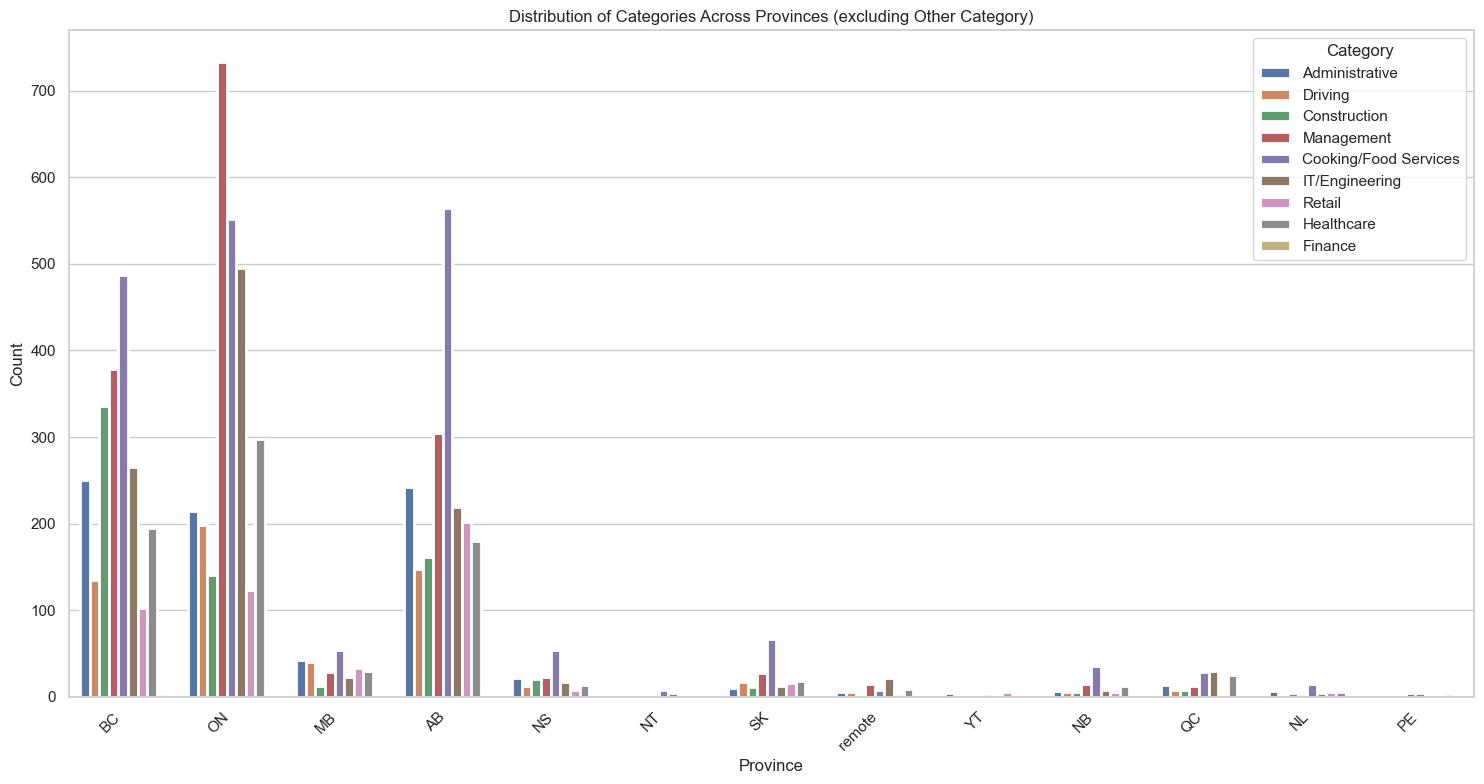

In [78]:
# Setting some parameters for the graph
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))  

# Filtering out the 'Other' category
filtered_df = combined_job_df[combined_job_df['category'] != 'Other']

# Plotting a count plot to show the distribution of categories across provinces
sns.countplot(x="Province", hue="category", data=filtered_df, linewidth=2)  # Increased linewidth

plt.title('Distribution of Categories Across Provinces (excluding Other Category)')
plt.xlabel('Province')
plt.ylabel('Count')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.legend(title='Category', loc='upper right')

plt.tight_layout()
plt.show()



<h2 style='color:#1255db'>What We Visualized !</h2>

**Cooking and food services  on an average have the most of the jobs across all provinces**

**Management jobs are also on the peak in most of the provinces**

**We see less jobs in the field of 'Driving' and 'Construction' across all the provinces**    

**We can see that Ontario and BC have most number of jobs**
    


### Calculating average salaries of all the categories in category column

In [79]:

average_salaries = combined_job_df.groupby('category')['salaries'].mean()
print(average_salaries)

category
Administrative           51525.085226
Construction             57436.902418
Cooking/Food Services    37315.463583
Driving                  71794.345830
Finance                  76104.846000
Healthcare               66373.471899
IT/Engineering           83287.724342
Management               85556.167141
Other                    52982.303647
Retail                   42713.603937
Name: salaries, dtype: float64


### Plotting average salaries of each category

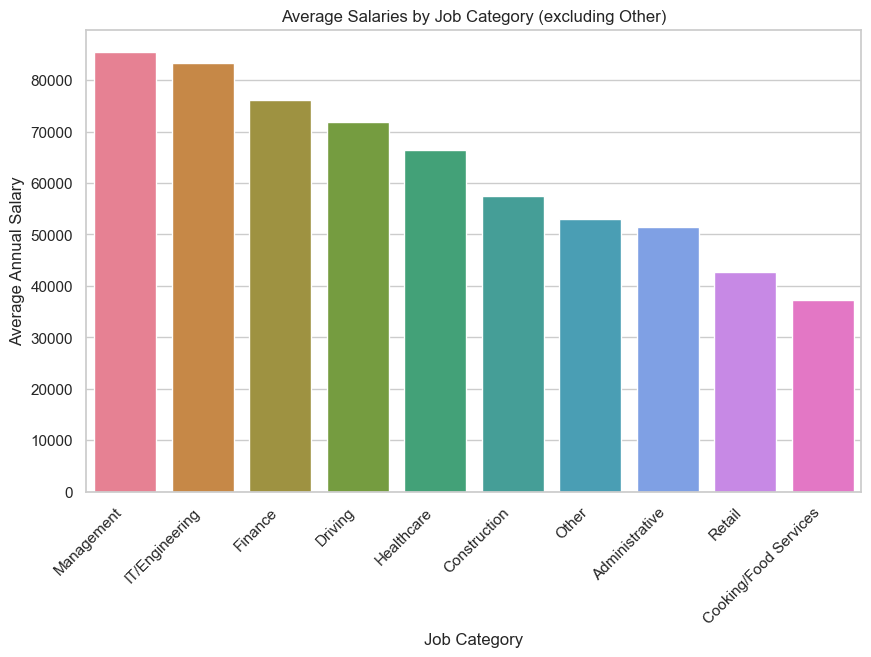

In [80]:

# Sort the results for better visualization
average_salaries = average_salaries.sort_values(ascending=False)

# Define a color palette for each category
colors = sns.color_palette("husl", len(average_salaries))

# Plotting a bar graph with specified colors
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=average_salaries.index, y=average_salaries.values, palette=colors)

plt.title('Average Salaries by Job Category (excluding Other)')
plt.xlabel('Job Category')
plt.ylabel('Average Annual Salary')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


<h2 style='color:#1255db'>What We Visualized !</h2>

**Managerial positions are paid the most while Cooking/Food sector is paid the least**

**IT/Engineering fields ranks the second highest**

In [81]:
combined_job_df.head()   

position                             company  \
2  [clerk, customer, service]                     Tabor Pizza Ltd   
3    [truck, crane, operator]                    AA Trucking Ltd.   
4                    [welder]  John & Sons Welding Hydraulics LTD   
5    [store, manager, retail]        S.C.DHILLON ENTERPRISES LTD.   
6                [bookkeeper]        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                   Responsibilities  \
2                                                                                                                                                                                                                                                                   Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease   
3                                                                                                                                                                                                                                                                            Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work   
4                                                                                                                                                                                                                                                                    Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications   
5                        Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers   
6  Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establish, maintain and balance various accounts using manual and computerized bookkeeping systems, Maintain general ledgers and financial statements, Post journal entries, Prepare other statistical, financial and accounting reports, Prepare tax returns, Prepare trial balance of books, Reconcile accounts   

   Minimum Experience  Maximum Experience        category           City  \
2                 0.0                 0.0  Administrative  Prince George   
3                 2.0                 3.0         Driving         Surrey   
4                 1.0                 2.0    Construction       Oakville   
5                 2.0                 3.0      Management         Surrey   
6                 2.0                 3.0           Other         Surrey   

  Province  
2       BC  
3       BC  
4       ON  
5       BC  
6       BC

## Plotting Category vs Minimum Experience Required

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6488\818914681.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='Minimum Experience', data=combined_job_df, ci=None, palette='viridis')


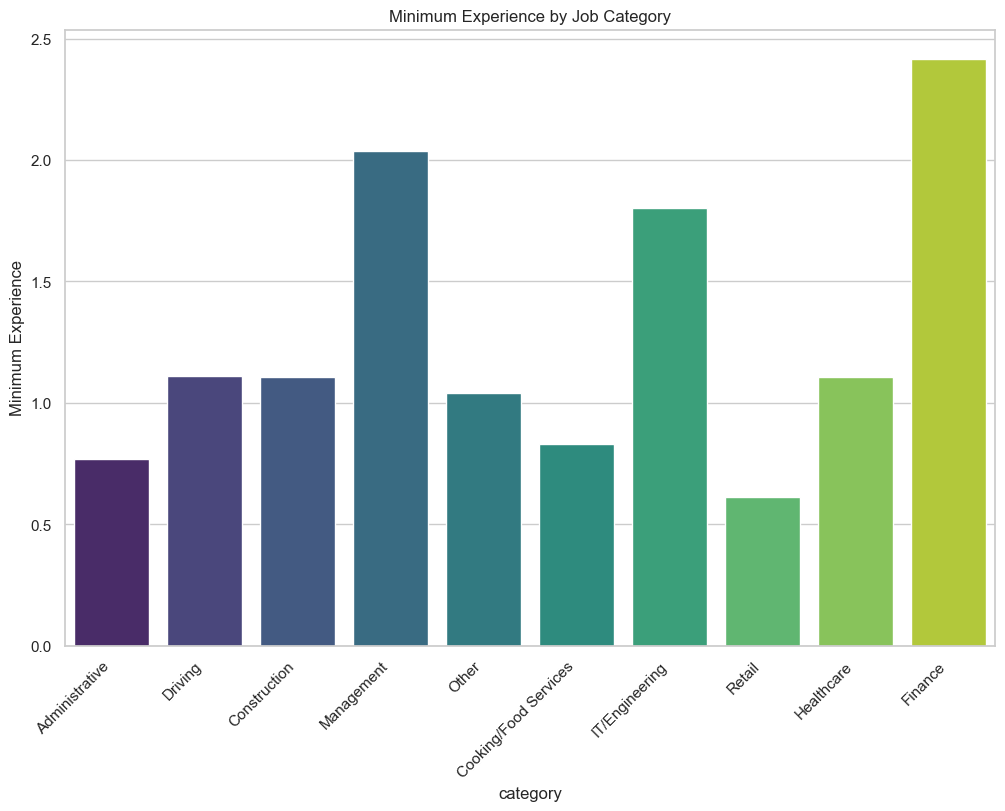

In [82]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='Minimum Experience', data=combined_job_df, ci=None, palette='viridis')
plt.title('Minimum Experience by Job Category')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2 style='color:#1255db'>What We Visualized !</h2>

**Finance sector required the maximum experience to enter specific field**

**Management sector ranks second**

**Retail sector requires the least experience to enter the field**   

## Plotting number of jobs each province has 

In [83]:
combined_job_df['Province'].unique()

array(['BC', 'ON', 'MB', 'AB', 'NS', 'NT', 'SK', 'QC', 'remote', 'YT',
       'PE', 'NB', 'NL'], dtype=object)

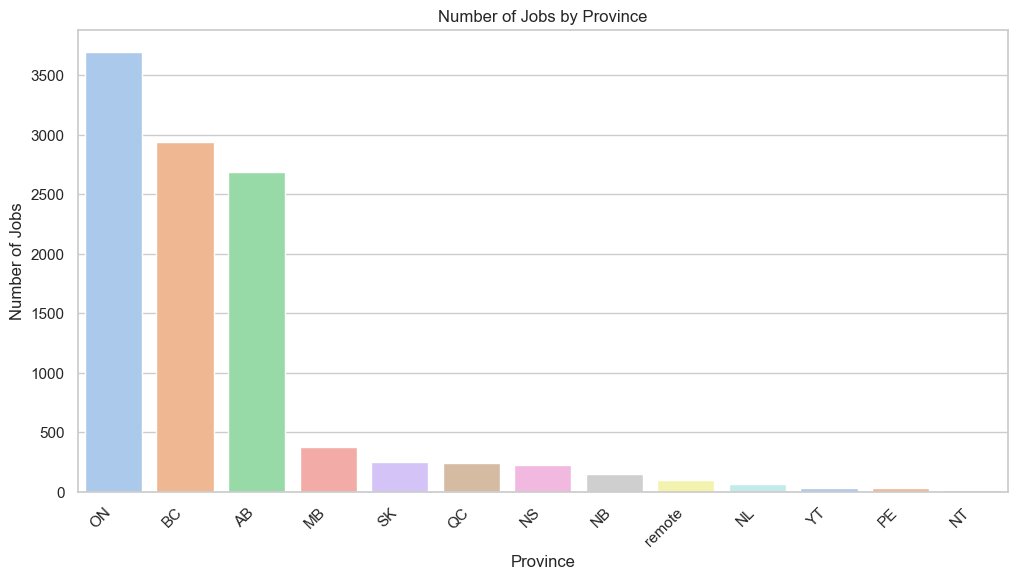

In [84]:
# Count the number of jobs in each province
province_job_counts = combined_job_df['Province'].value_counts()

# Define a color palette for each province
colors = sns.color_palette("pastel", len(province_job_counts))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=province_job_counts.index, y=province_job_counts.values, palette=colors)
plt.title('Number of Jobs by Province')
plt.xlabel('Province')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<h2 style='color:#1255db'>What We Visualized !</h2>

**Ontario holds the maximum number of jobs**

**Northwest Territories holds the least number of jobs**

In [85]:
combined_job_df.head()

position                             company  \
2  [clerk, customer, service]                     Tabor Pizza Ltd   
3    [truck, crane, operator]                    AA Trucking Ltd.   
4                    [welder]  John & Sons Welding Hydraulics LTD   
5    [store, manager, retail]        S.C.DHILLON ENTERPRISES LTD.   
6                [bookkeeper]        S.C.DHILLON ENTERPRISES LTD.   

             location posted date  salaries                    Experience  \
2  Prince George (BC)  2023-10-28   34840.0                    Will train   
3         Surrey (BC)  2023-10-28   74360.0  2 years to less than 3 years   
4       Oakville (ON)  2023-10-28   52000.0   1 year to less than 2 years   
5         Surrey (BC)  2023-10-28   62400.0  2 years to less than 3 years   
6         Surrey (BC)  2023-10-28   57200.0  2 years to less than 3 years   

                                                                                                                                                                                                                                                                                                                                                                                                                   Responsibilities  \
2                                                                                                                                                                                                                                                                   Receive payments, Operate cash register, Greet customers and discuss type, quality and quantity of merchandise or services sought for purchase, rental or lease   
3                                                                                                                                                                                                                                                                            Operate mobile and tower cranes to lift, move, position or place equipment and materials, Clean and lubricate cranes, Perform routine maintenance work   
4                                                                                                                                                                                                                                                                    Read and interpret welding blueprints, drawings specifications, manuals and processes, Examine welds and ensure that they meet standards and/or specifications   
5                        Manage staff and assign duties, Determine merchandise and services to be sold, Implement price and credits policies, Locate, select and procure merchandise for resale, Determine staffing requirements, Resolve problems that arise, such as customer complaints and supply shortages, Plan, organize, direct, control and evaluate daily operations, Recruit, hire and supervise staff and/or volunteers   
6  Calculate and prepare cheques for payroll, Calculate fixed assets and depreciation, Keep financial records and establish, maintain and balance various accounts using manual and computerized bookkeeping systems, Maintain general ledgers and financial statements, Post journal entries, Prepare other statistical, financial and accounting reports, Prepare tax returns, Prepare trial balance of books, Reconcile accounts   

   Minimum Experience  Maximum Experience        category           City  \
2                 0.0                 0.0  Administrative  Prince George   
3                 2.0                 3.0         Driving         Surrey   
4                 1.0                 2.0    Construction       Oakville   
5                 2.0                 3.0      Management         Surrey   
6                 2.0                 3.0           Other         Surrey   

  Province  
2       BC  
3       BC  
4       ON  
5       BC  
6       BC

# Plotting High Minimum experience Required for each job with respect to category

In [86]:
high_min_exp_df=combined_job_df[combined_job_df['Minimum Experience']>2]


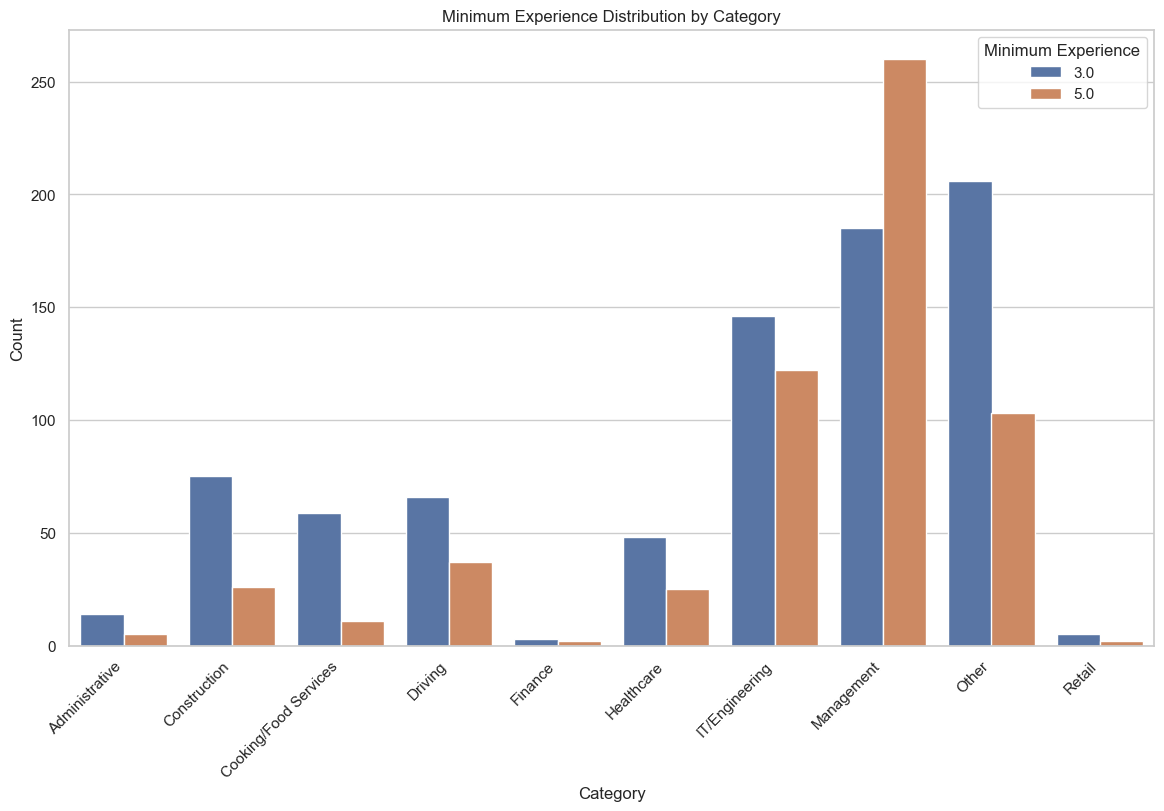

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category and minimum experience, and count the occurrences
exp_counts = high_min_exp_df.groupby(['category', 'Minimum Experience']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='category', y='count', hue='Minimum Experience', data=exp_counts)
plt.title('Minimum Experience Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Minimum Experience')
plt.show()


<h2 style='color:#1255db'>What We Visualized !</h2>

**We noticed that most of the management sector job required high minimum experience**

**IT/Engeneering sector ranks second in requirement for higher minimum experience requirement in most of the positions**

**We can hardly any jobs with high requirement of minimum experience for Finance Sector**

# Plotting a line plot to see how job trends of each category vary with respect to time

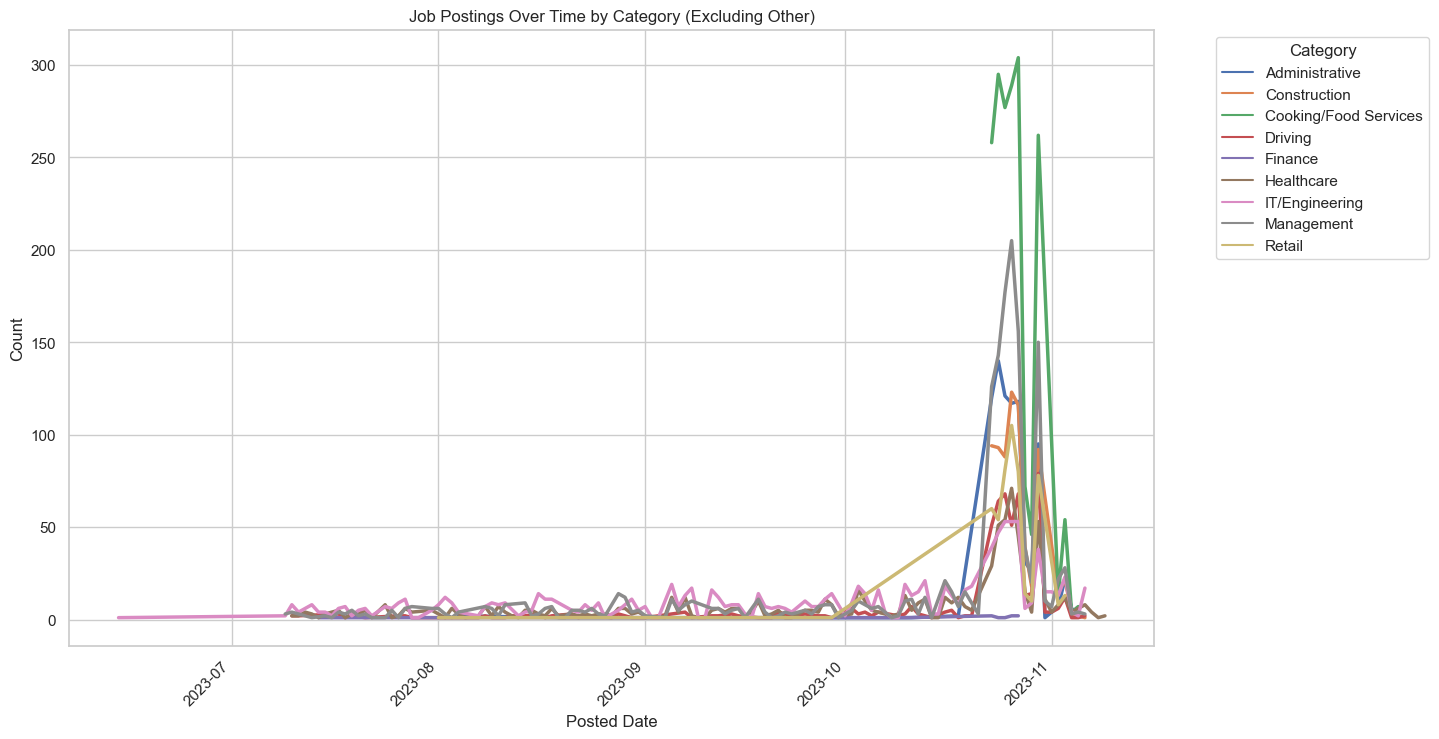

In [88]:
# Filter out rows with 'Other' category
filtered_df = combined_job_df[combined_job_df['category'] != 'Other']

# Group by category and posted date, and count the occurrences
date_counts = filtered_df.groupby(['category', 'posted date']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='posted date', y='count', hue='category', data=date_counts, linewidth=2.5)  # Increase line width
plt.title('Job Postings Over Time by Category (Excluding Other)')
plt.xlabel('Posted Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

<h2 style='color:#1255db'>What We Visualized !</h2>

**Cooking and Food Services Sector touched the maximum among all other categories on the 11 month**

**We can notice too many fluctuations in the IT/Engeneering sector during the course of this timeline**

**Almost all the categories reached their peak in the 11th month**

# 6. Outliers

### Outliers Detection in Minimum Experience using Box Plot

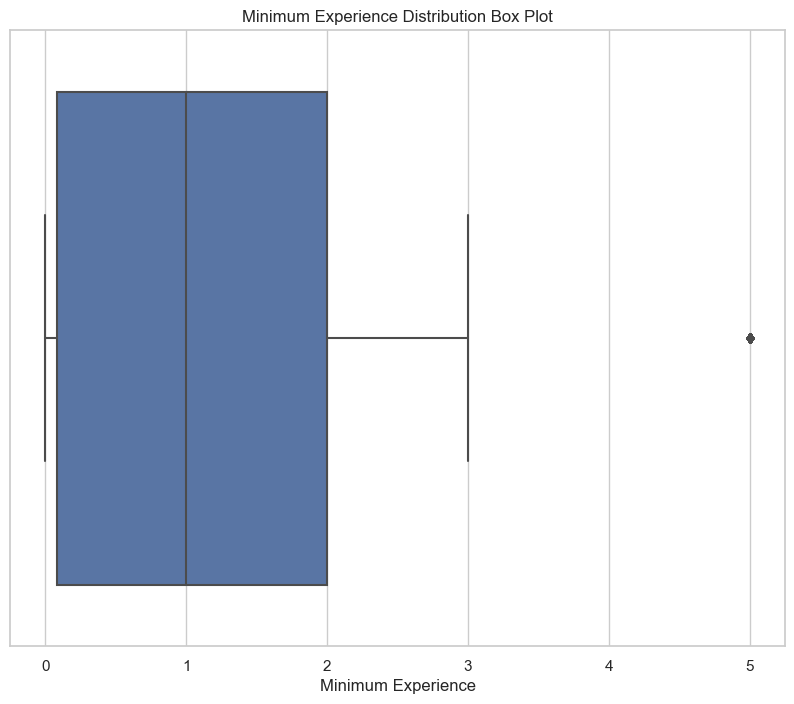

In [89]:
# Plotting the box plot for the salaries column
plt.figure(figsize=(10, 8))
sns.boxplot(x = combined_job_df['Minimum Experience'])
plt.title("Minimum Experience Distribution Box Plot")
plt.xlabel("Minimum Experience")
plt.show()

In [90]:
#using IQR to find outliers 
Q1 = combined_job_df['Minimum Experience'].quantile(0.25)
Q3 = combined_job_df['Minimum Experience'].quantile(0.75)
IQR = Q3 - Q1

In [91]:
# Finding the lower and upper bound 
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

0 4.875


In [92]:
# Checking the outliers df
exp=combined_job_df[(combined_job_df['Minimum Experience'] < lower_bound) | (combined_job_df['Minimum Experience'] > upper_bound)]
exp

position  \
84                                                                    [client, support, representative, system]   
103                                                                                                 [carpenter]   
136                                                                                           [coffee, roaster]   
186                                                                                    [nail, care, technician]   
217                                             [general, manager, financial, communication, business, service]   
275                                                                                            [tattoo, artist]   
382                                                                        [custom, manager, business, service]   
385                                                                                             [captain, ship]   
390                                                         [professional, service, manager, business, service]   
616                                                                            [community, support, supervisor]   
624                                                                                              [cabinetmaker]   
629                                                                                         [roofing, mechanic]   
649                                                                                      [executive, recruiter]   
692                                                                                                     [coach]   
705                                                                                  [custom, clearance, agent]   
714                                                              [control, technician, electrical, electronics]   
721                                                                                                [bookkeeper]   
835                                                                                     [construction, manager]   
964                                                                                       [fabrication, welder]   
1061                                                                                                  [plumber]   
1128                                                                          [child, caregiver, private, home]   
1171                              [ceo, chief, executive, officer, financial, communication, business, service]   
1211                                                                                       [framing, carpenter]   
1230                                                                                      [excavator, operator]   
1292                                                                                     [television, repairer]   
1296                                                                          [automotive, service, technician]   
1348                                                                                   [supply, chain, manager]   
1352                                                                                       [manager, marketing]   
1393                                                                                     [automobile, mechanic]   
1458                                                                                       [autobody, repairer]   
1472                                                                                                [carpenter]   
1473                                                                                                [carpenter]   
1474                                                                                   [millwright, industrial]   
1486                                                                              [senior, software, developer]   
1610                                                                          

In [93]:
exp.shape

(593, 12)

* We found 12 outliers in minimum experience column

## Outliers Detection in Salaries column

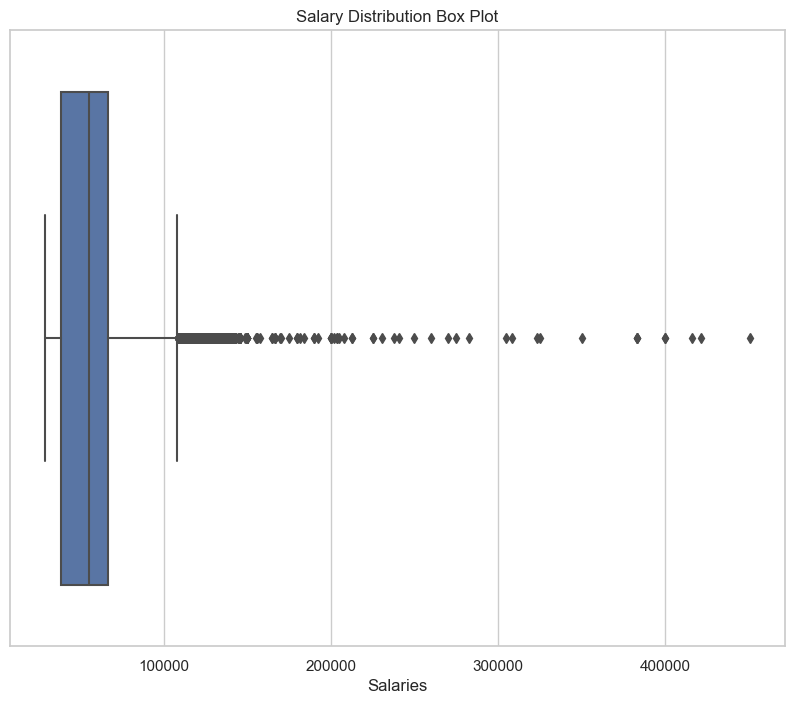

In [94]:
# Plotting the box plot for the salaries column
plt.figure(figsize=(10, 8))
sns.boxplot(x = combined_job_df['salaries'])
plt.title("Salary Distribution Box Plot")
plt.xlabel("Salaries")
plt.show()

<Axes: xlabel='salaries', ylabel='Count'>

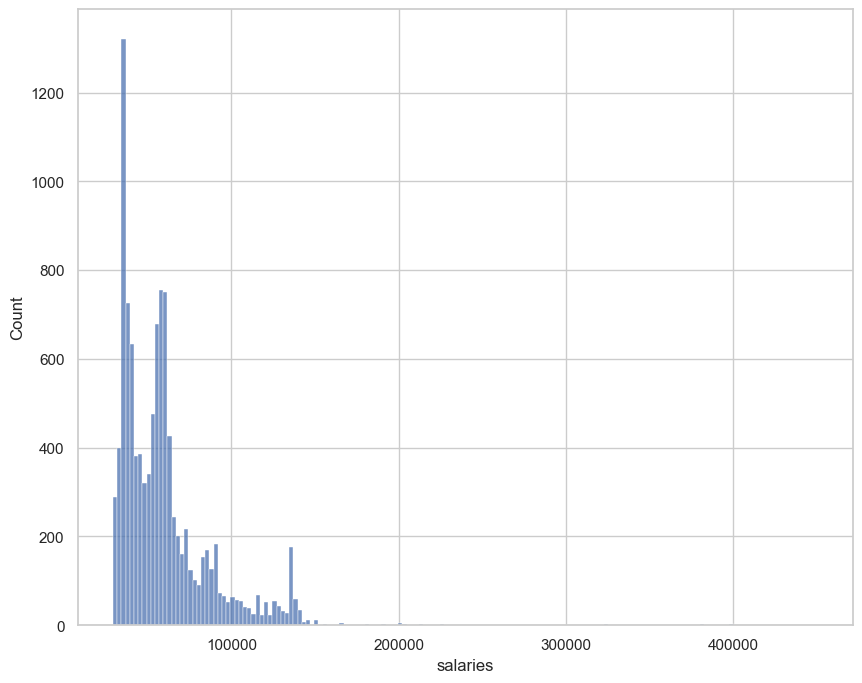

In [95]:
# Plotting histogram for salaries column
plt.figure(figsize=(10, 8))
sns.histplot(combined_job_df['salaries'])

In [96]:
# Using describe method to get the statistics for the salaries column
combined_job_df['salaries'].describe()

count     10809.000000
mean      59696.967212
std       28821.591552
min       29120.000000
25%       38812.800000
50%       55120.000000
75%       66560.000000
max      450500.000000
Name: salaries, dtype: float64

#### Conclusion drawn:
* Mean Salary is 58906.235373
* From the Box Plox, We can see that most of the salaries falls below near to 80000
* We know that some position have higher salaries so we have to analyze salary position wise
* We also know that salaray depends on category, position so we cannot compare salary of different position,domain in one basket.

### Creating a new dataframe with high salaries

In [97]:
higher_salary_df = combined_job_df[combined_job_df['salaries']>80000]
higher_salary_df.shape

(1857, 12)

### Checking the position and their count in higher_salary_df dataframe

In [98]:
higher_salary_df['position'].value_counts()

[general, manager, financial, communication, business, service]                                              190
[software, developer]                                                                                        187
[software, engineer]                                                                                         108
[database, analyst]                                                                                           61
[financial, communication, business, service]                                                                 25
[business, system, analyst]                                                                                   20
[general, manager, good, production, utility, transportation, construction]                                   19
[information, technology, business, analyst]                                                                  18
[information, system, manager]                                                                  

### Checking the number of records for higher salaries with respect to categories

In [99]:
higher_salary_df['category'].value_counts()

Management        712
IT/Engineering    694
Other             166
Driving           161
Healthcare         82
Construction       34
Administrative      4
Finance             3
Retail              1
Name: category, dtype: int64

### Plotting the histogram for the higher_salary_df

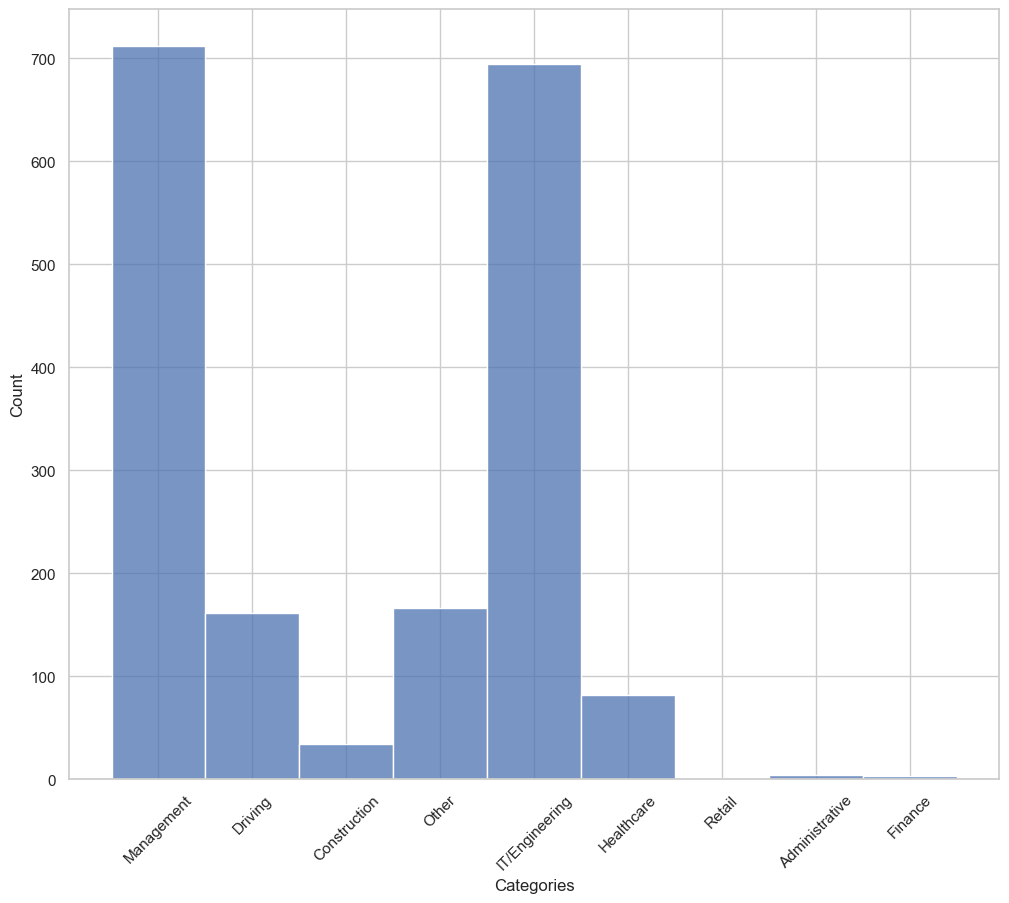

In [100]:
#plotting higher salaries 
plt.figure(figsize=(12, 10))
sns.histplot(higher_salary_df['category'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

* We can see that Mangagement, IT/Engineering categories have the most higher salaries.
* We can also see that Retail,Administrative,Finance  sector have few higher salaries.


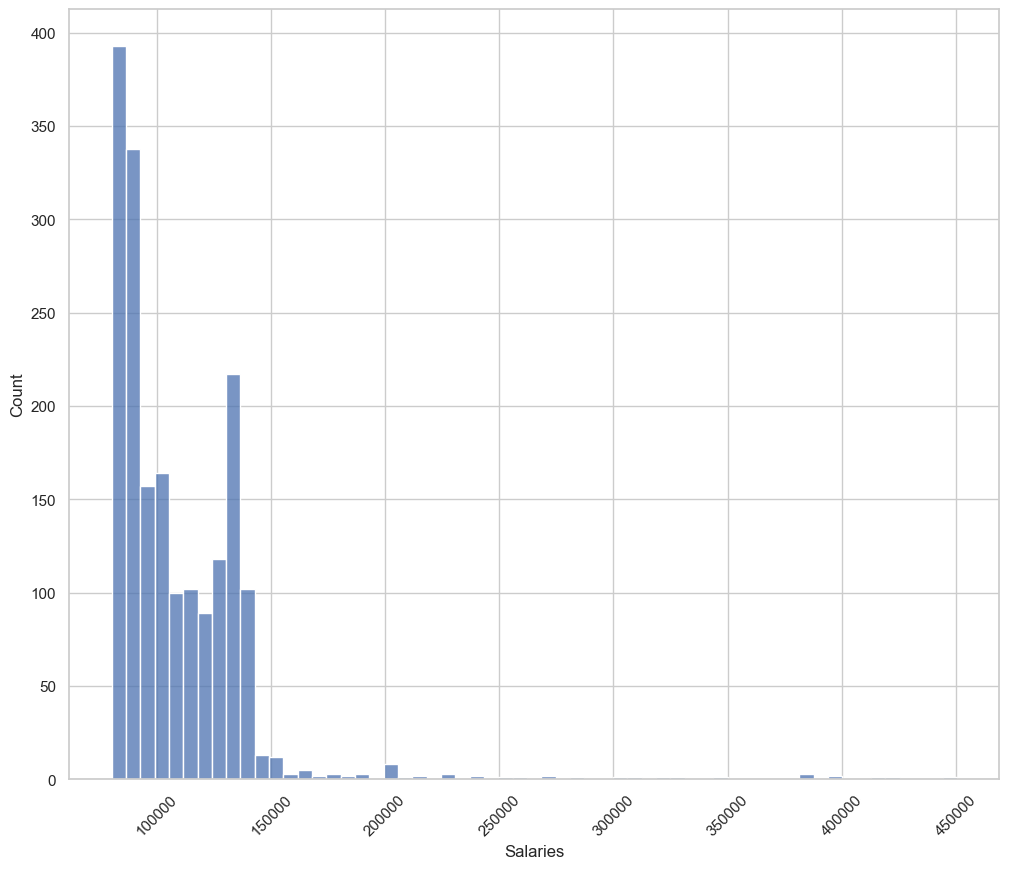

In [101]:
#plotting higher salaries 
plt.figure(figsize=(12, 10))
sns.histplot(higher_salary_df['salaries'])
plt.xlabel('Salaries')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

### Plotting the salaries with repect to their categories

In [102]:
#mean salary of each category
mean_salary_category = combined_job_df.groupby('category')['salaries'].mean().reset_index()
mean_salary_category

category      salaries
0         Administrative  51525.085226
1           Construction  57436.902418
2  Cooking/Food Services  37315.463583
3                Driving  71794.345830
4                Finance  76104.846000
5             Healthcare  66373.471899
6         IT/Engineering  83287.724342
7             Management  85556.167141
8                  Other  52982.303647
9                 Retail  42713.603937

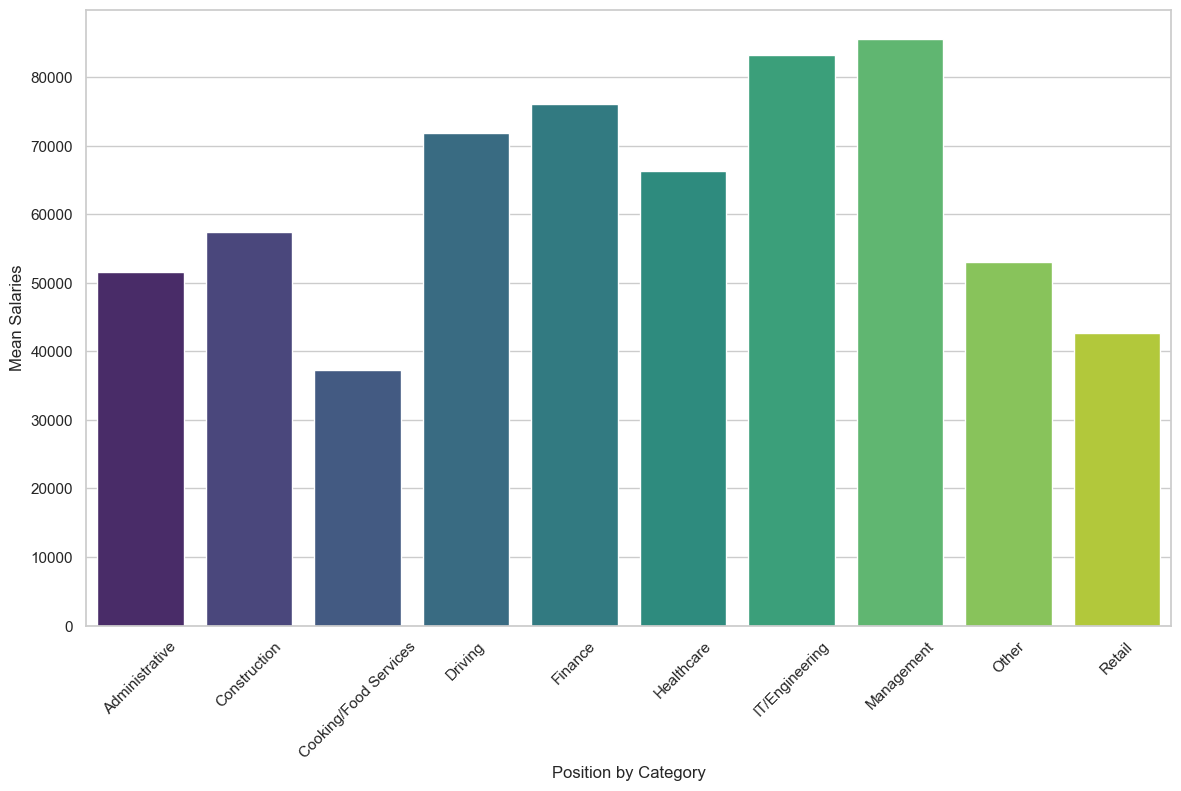

In [103]:
# Plotting mean salary for each category
plt.figure(figsize=(14,8))
sns.barplot(x='category',y='salaries',data=mean_salary_category, palette='viridis')
plt.xlabel('Position by Category')
plt.ylabel('Mean Salaries')
plt.xticks(rotation = 45)
plt.show()

## Outlier Handling approach for salary column:
* Will be working with each category seperately.
* Use 3 methods to handle outliers : Flooring Capping, IQR,Log Transformation

In [104]:
combined_job_df['category'].value_counts()

Other                    2878
Cooking/Food Services    1881
Management               1546
IT/Engineering           1102
Administrative            819
Healthcare                790
Construction              703
Driving                   572
Retail                    508
Finance                    10
Name: category, dtype: int64

In [105]:
combined_job_df['category'].value_counts()

Other                    2878
Cooking/Food Services    1881
Management               1546
IT/Engineering           1102
Administrative            819
Healthcare                790
Construction              703
Driving                   572
Retail                    508
Finance                    10
Name: category, dtype: int64

### We are creating a Outlier class which which will find outliers in salaries using Box Plot and IQR. We will address outliers using Flooring and capping method, trimming method and log transformation method inside this class. We are doing everything for 'salaries' column.

In [106]:
class outliers:
    
    def __init__(self,df):
        self.df = df
        
    def load_data(self):
        return self.df
    
    #Describing statistics
    def describe(self):
        return self.df.describe()
    
    # Creting a box plot
    def box_plot(self):
        plt.figure(figsize=(10, 8))
        sns.boxplot(x = self.df['salaries'])
        category = self.df['category'].unique()
        plt.title(f"{category}Salary Distribution Box Plot")
        plt.xlabel("Salaries")
        plt.show()
        
    # finding IQR,lower bound,upper bound,addressing outliers using flooring,trimming and log transformation   
    def iqr(self):
        Q1 = self.df['salaries'].quantile(0.25)
        Q3 = self.df['salaries'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers=self.df[(self.df['salaries'] < lower_bound) | (self.df['salaries'] > upper_bound)]
        category = self.df['category'].unique()
        
        # Approach 1: Flooring and capping using quantile of lower and upper bound
        floor_df = self.df.copy()
        floor_df['salaries'] = floor_df['salaries'].clip(lower=lower_bound, upper=upper_bound)
        
        # Approach 2: Trimming using quantile of lower and upper bound
        trim_df = self.df.copy()
        trim_df = trim_df[(trim_df['salaries'] >= lower_bound) & (trim_df['salaries'] <= upper_bound)]
        
        # Approach 3: taking log transformation of salaries
        logt_df = self.df.copy()
        logt_df['salaries'] = np.log(logt_df['salaries'])
        return lower_bound,upper_bound,outliers,floor_df,trim_df,logt_df 

# Passing variables in each category    
admin_job_df = combined_job_df[combined_job_df['category'] == 'Administrative']
mgmt_job_df = combined_job_df[combined_job_df['category'] == 'Management']
it_job_df = combined_job_df[combined_job_df['category'] == 'IT/Engineering']
food_job_df = combined_job_df[combined_job_df['category'] == 'Cooking/Food Services']
health_job_df = combined_job_df[combined_job_df['category'] == 'Healthcare']
construct_job_df = combined_job_df[combined_job_df['category'] == 'Construction']
driving_job_df = combined_job_df[combined_job_df['category'] == 'Driving']
retail_job_df = combined_job_df[combined_job_df['category'] == 'Retail']

# Creating object for each Category
admin_job = outliers(admin_job_df)
mgmt_job = outliers(mgmt_job_df)
it_job = outliers(it_job_df)
food_job = outliers(food_job_df)
health_job = outliers(health_job_df)
construct_job = outliers(construct_job_df)
driving_job = outliers(driving_job_df)
retail_job = outliers(retail_job_df)




### For Administrative Category

In [107]:
admin_job.describe()

salaries  Minimum Experience  Maximum Experience
count     819.000000          819.000000          819.000000
mean    51525.085226            0.770452            1.401709
std     10398.156236            0.699585            1.026148
min     31200.000000            0.000000            0.000000
25%     45760.000000            0.083333            0.583333
50%     54080.000000            1.000000            2.000000
75%     57200.000000            1.000000            2.000000
max    157500.000000            5.000000            5.000000

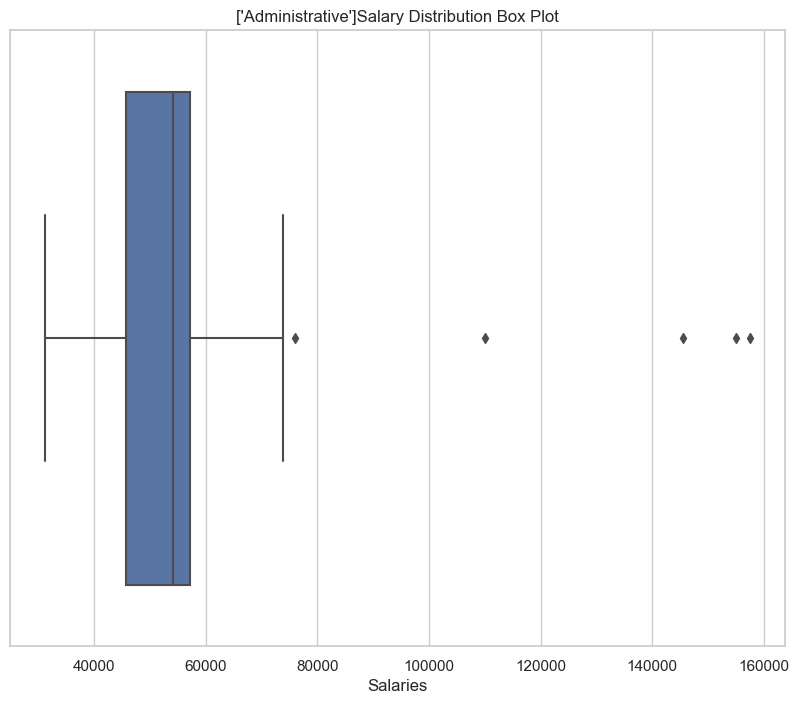

In [108]:
#box plot
admin_job.box_plot()

In [109]:
lower_bound,upper_bound,outliers,admin_floor_df,admin_trim_df,admin_logt_df = admin_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nLower Bound: {lower_bound}\nUpper Bound :{upper_bound}\nDataframe shape after handling outliers using flooring :{admin_floor_df.shape}\nDataframe shape after handling outliers using trimming:{admin_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{admin_logt_df.shape}")




Outliers Shape : (5, 12)
Lower Bound: 28600.0
Upper Bound :74360.0
Dataframe shape after handling outliers using flooring :(819, 12)
Dataframe shape after handling outliers using trimming:(814, 12)
Dataframe shape after handling outliers using Log Transform :(819, 12)


In [110]:
# This is changed statistical measurement after handling outliers using flooring 
admin_floor_df.describe()

salaries  Minimum Experience  Maximum Experience
count    819.000000          819.000000          819.000000
mean   51192.704274            0.770452            1.401709
std     8285.694841            0.699585            1.026148
min    31200.000000            0.000000            0.000000
25%    45760.000000            0.083333            0.583333
50%    54080.000000            1.000000            2.000000
75%    57200.000000            1.000000            2.000000
max    74360.000000            5.000000            5.000000

In [111]:
admin_trim_df.describe()

salaries  Minimum Experience  Maximum Experience
count    814.000000          814.000000          814.000000
mean   51050.399017            0.767711            1.397318
std     8108.871609            0.698564            1.025401
min    31200.000000            0.000000            0.000000
25%    45760.000000            0.083333            0.583333
50%    53622.400000            1.000000            2.000000
75%    57200.000000            1.000000            2.000000
max    73840.000000            5.000000            5.000000

In [112]:
admin_logt_df.describe()

salaries  Minimum Experience  Maximum Experience
count  819.000000          819.000000          819.000000
mean    10.831972            0.770452            1.401709
std      0.187799            0.699585            1.026148
min     10.348173            0.000000            0.000000
25%     10.731166            0.083333            0.583333
50%     10.898220            1.000000            2.000000
75%     10.954309            1.000000            2.000000
max     11.967181            5.000000            5.000000

* Conclusion:
  * 5 outliers were detected in administrative category 
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers
    * We can see differences in mean, median and other statistical measuement between 3 different approach of outlier handling

## Note , perform describe() for all category after handling outliers similar to admin category and show differences

### For Management Category

In [113]:
mgmt_job.describe()

salaries  Minimum Experience  Maximum Experience
count    1546.000000         1546.000000         1546.000000
mean    85556.167141            2.035737            2.044308
std     36936.684184            1.550882            1.512249
min     30000.000000            0.000000            0.000000
25%     57200.000000            1.000000            1.000000
50%     72800.000000            2.000000            2.000000
75%    120640.000000            3.000000            3.000000
max    350000.000000            5.000000            5.000000

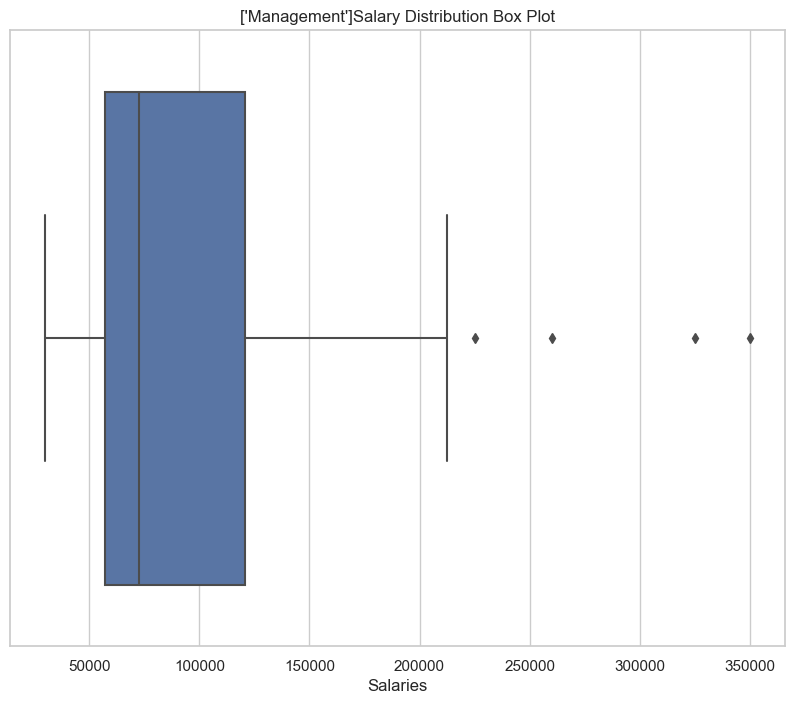

In [114]:
#box plot
mgmt_job.box_plot()

In [115]:
lower_bound,upper_bound,outliers,mgmt_floor_df,mgmt_trim_df,mgmt_logt_df = mgmt_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{mgmt_floor_df.shape}\nDataframe shape after handling outliers using trimming:{mgmt_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{mgmt_logt_df.shape}")






Outliers Shape : (4, 12)
Dataframe shape after handling outliers using flooring :(1546, 12)
Dataframe shape after handling outliers using trimming:(1542, 12)
Dataframe shape after handling outliers using Log Transform :(1546, 12)


* Conclusion:
    * 4 outliers were detected in administrative category 

    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### For Food/Cook  Industry

In [116]:
food_job.describe()

salaries  Minimum Experience  Maximum Experience
count   1881.000000         1881.000000         1881.000000
mean   37315.463583            0.829390            1.460881
std     5994.366460            0.805265            1.200876
min    29120.000000            0.000000            0.000000
25%    34424.000000            0.000000            0.000000
50%    35360.000000            1.000000            2.000000
75%    38480.000000            1.000000            2.000000
max    64480.000000            5.000000            5.000000

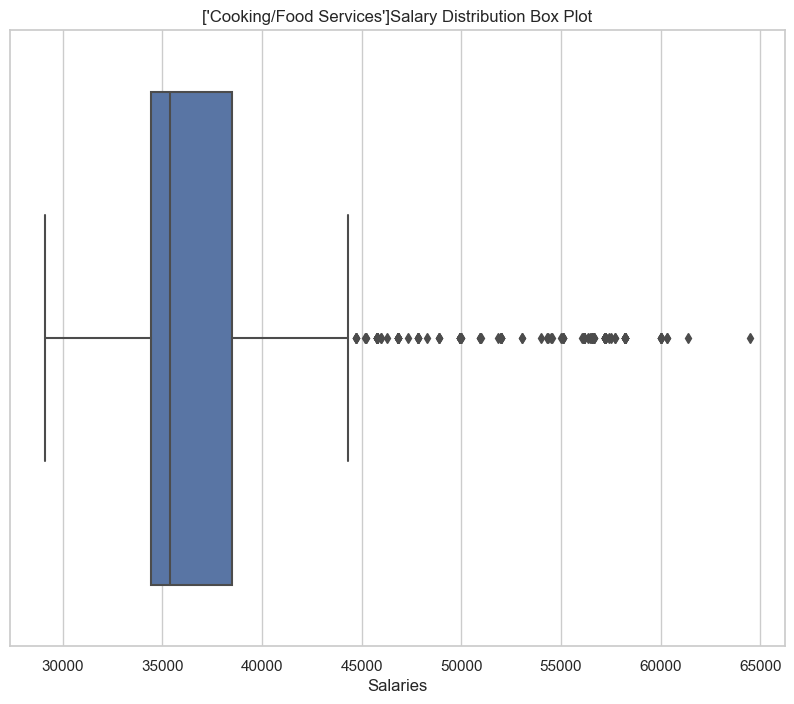

In [117]:
food_job.box_plot()

In [118]:
lower_bound,upper_bound,outliers,food_floor_df,food_trim_df,food_logt_df = food_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{food_floor_df.shape}\nDataframe shape after handling outliers using trimming:{food_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{food_logt_df.shape}")



Outliers Shape : (174, 12)
Dataframe shape after handling outliers using flooring :(1881, 12)
Dataframe shape after handling outliers using trimming:(1707, 12)
Dataframe shape after handling outliers using Log Transform :(1881, 12)


* Conclusion:
    * 174 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### IT/Data Science Category

In [119]:
it_job.describe()

salaries  Minimum Experience  Maximum Experience
count    1102.000000         1102.000000         1102.000000
mean    83287.724342            1.804446            2.155097
std     25942.663610            1.406736            1.494675
min     31720.000000            0.000000            0.000000
25%     67537.600000            1.000000            1.000000
50%     86320.000000            1.000000            2.000000
75%     93600.000000            2.000000            3.000000
max    282500.000000            5.000000            5.000000

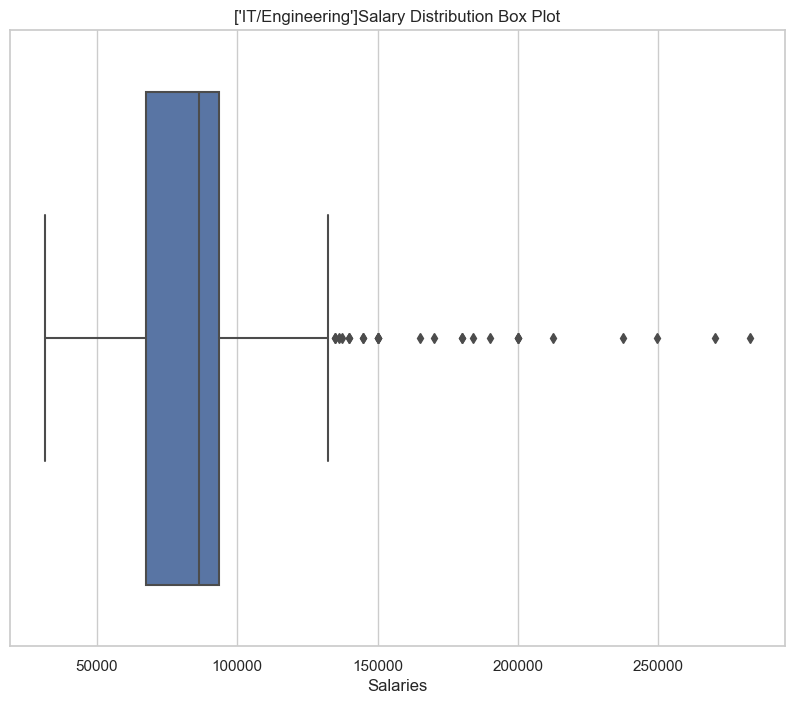

In [120]:
it_job.box_plot()

In [121]:
lower_bound,upper_bound,outliers,it_floor_df,it_trim_df,it_logt_df = it_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{it_floor_df.shape}\nDataframe shape after handling outliers using trimming:{it_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{it_logt_df.shape}")



Outliers Shape : (26, 12)
Dataframe shape after handling outliers using flooring :(1102, 12)
Dataframe shape after handling outliers using trimming:(1076, 12)
Dataframe shape after handling outliers using Log Transform :(1102, 12)


* Conclusion:
    * 26 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### For Health Category

In [122]:
health_job.describe()

salaries  Minimum Experience  Maximum Experience
count     790.000000          790.000000          790.000000
mean    66373.471899            1.104958            1.695675
std     37852.369649            1.064238            1.305682
min     30160.000000            0.000000            0.000000
25%     56201.600000            0.583333            0.583333
50%     62400.000000            1.000000            2.000000
75%     70720.000000            1.000000            2.000000
max    450500.000000            5.000000            5.000000

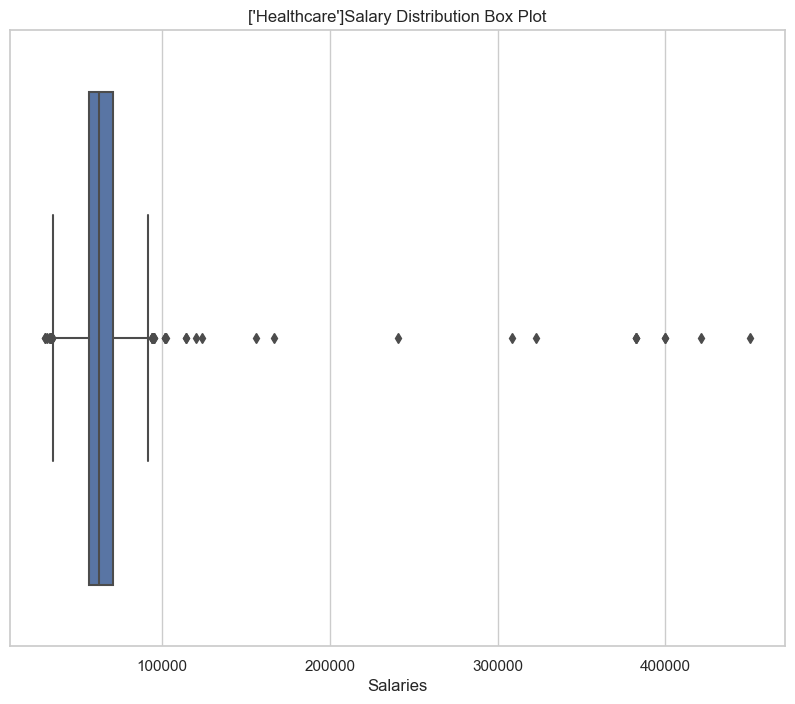

In [123]:
health_job.box_plot()

In [124]:
lower_bound,upper_bound,outliers,health_floor_df,health_trim_df,health_logt_df = health_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{health_floor_df.shape}\nDataframe shape after handling outliers using trimming:{health_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{health_logt_df.shape}")



Outliers Shape : (43, 12)
Dataframe shape after handling outliers using flooring :(790, 12)
Dataframe shape after handling outliers using trimming:(747, 12)
Dataframe shape after handling outliers using Log Transform :(790, 12)


* Conclusion:
    * 43 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### For Construction Category

In [125]:
construct_job.describe()

salaries  Minimum Experience  Maximum Experience
count     703.000000          703.000000          703.000000
mean    57436.902418            1.108345            1.580488
std     12066.382258            1.263843            1.641076
min     34424.000000            0.000000            0.000000
25%     46800.000000            0.000000            0.000000
50%     57200.000000            1.000000            1.000000
75%     62400.000000            2.000000            3.000000
max    114400.000000            5.000000            5.000000

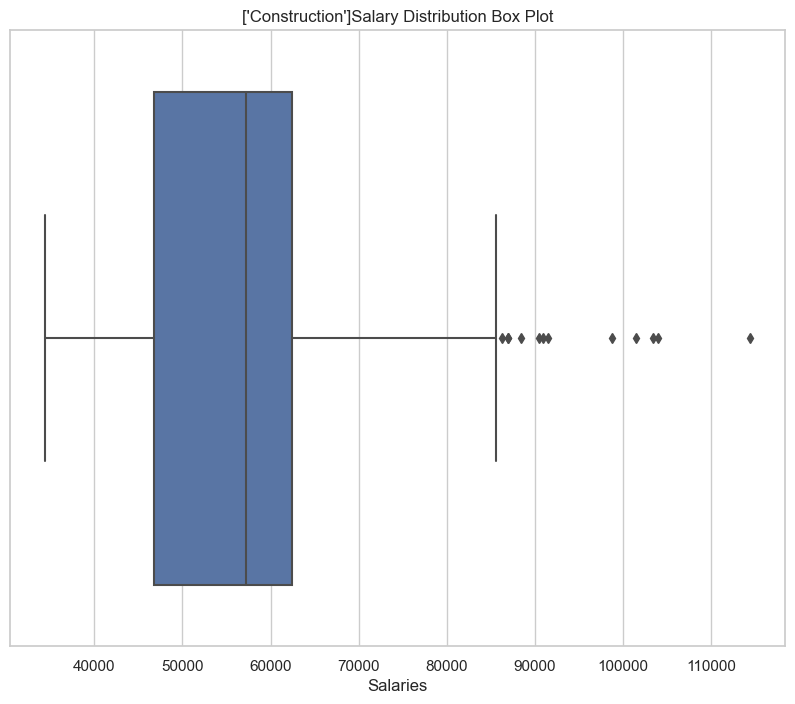

In [126]:
construct_job.box_plot()

In [127]:
lower_bound,upper_bound,outliers,construct_floor_df,construct_trim_df,construct_logt_df = construct_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{construct_floor_df.shape}\nDataframe shape after handling outliers using trimming:{construct_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{construct_logt_df.shape}")



Outliers Shape : (12, 12)
Dataframe shape after handling outliers using flooring :(703, 12)
Dataframe shape after handling outliers using trimming:(691, 12)
Dataframe shape after handling outliers using Log Transform :(703, 12)


* Conclusion:
    * 12 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### For Driving Category

In [128]:
driving_job.describe()

salaries  Minimum Experience  Maximum Experience
count     572.000000          572.000000          572.000000
mean    71794.345830            1.112179            1.369172
std     30401.981325            1.446647            1.688907
min     31200.000000            0.000000            0.000000
25%     54678.000000            0.000000            0.000000
50%     60008.000000            0.583333            0.583333
75%     85488.000000            2.000000            2.000000
max    225000.000000            5.000000            5.000000

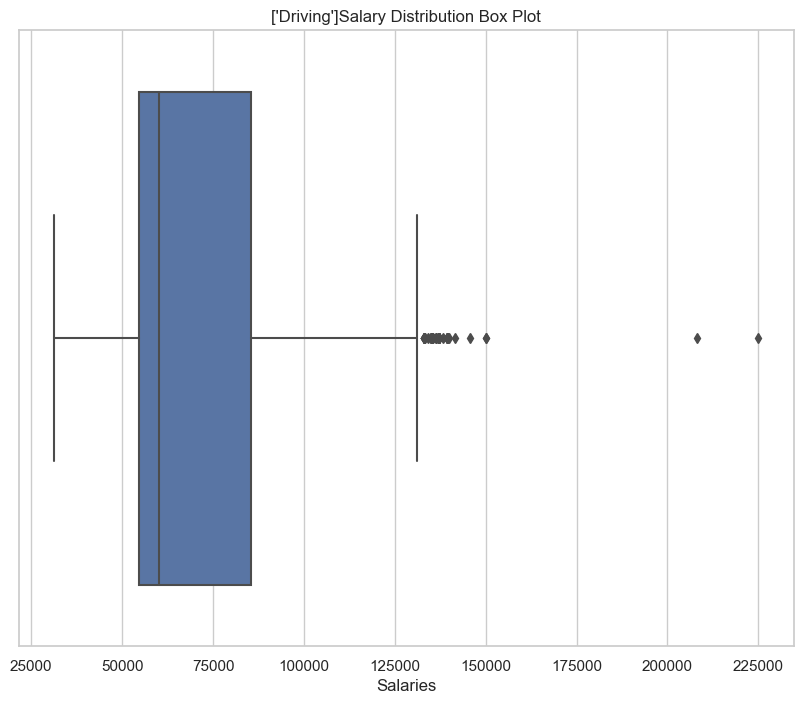

In [129]:
driving_job.box_plot()

In [130]:
lower_bound,upper_bound,outliers,driving_floor_df,driving_trim_df,driving_logt_df = driving_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{driving_floor_df.shape}\nDataframe shape after handling outliers using trimming:{driving_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{driving_logt_df.shape}")


Outliers Shape : (58, 12)
Dataframe shape after handling outliers using flooring :(572, 12)
Dataframe shape after handling outliers using trimming:(514, 12)
Dataframe shape after handling outliers using Log Transform :(572, 12)


* Conclusion:
    * 58 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

### For Retail Category

In [131]:
retail_job.describe()

salaries  Minimum Experience  Maximum Experience
count     508.000000          508.000000          508.000000
mean    42713.603937            0.613353            1.131562
std      9492.624195            0.668483            1.054819
min     29120.000000            0.000000            0.000000
25%     34840.000000            0.000000            0.000000
50%     43513.600000            0.583333            1.000000
75%     46975.000000            1.000000            2.000000
max    130000.000000            5.000000            5.000000

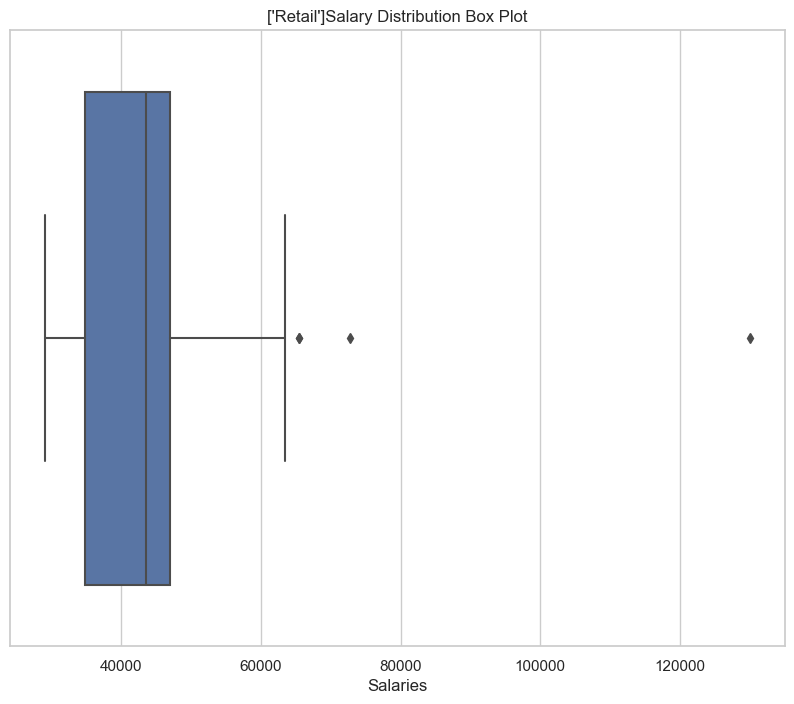

In [132]:
retail_job.box_plot()

In [133]:
lower_bound,upper_bound,outliers,retail_floor_df,retail_trim_df,retail_logt_df = retail_job.iqr()
print(f"Outliers Shape : {outliers.shape}\nDataframe shape after handling outliers using flooring :{retail_floor_df.shape}\nDataframe shape after handling outliers using trimming:{retail_trim_df.shape}\nDataframe shape after handling outliers using Log Transform :{retail_logt_df.shape}")



Outliers Shape : (4, 12)
Dataframe shape after handling outliers using flooring :(508, 12)
Dataframe shape after handling outliers using trimming:(504, 12)
Dataframe shape after handling outliers using Log Transform :(508, 12)


* Conclusion:
    * 4 outliers were detected in administrative category 
    
    * In Flooring and capping, method we replaced value below lower bound and  above upper bound with 25% quantile  and 75% Quantile respectively.
    * Simililarly in Trimming , we removed value below lower bound and above upper bound.
    * In log transformation, We took log of salary column.
    * We created 3 different dataframes for each methods after handling outliers

## Summarized Conclusion
* We used describe function to find statistics for all category i.e mean , median, std, min, max etc.
* We used box plot to find outliers in each category
* we Used IQR to find outliers in each category
* We addressed outliers using 3 methods and saved the new dataframe where outliers has been removed using flooring,trimming and log tranform for each category in different variables.

# Clustering

In [134]:
import warnings
warnings.filterwarnings("ignore")


1    382
0    362
2     75
Name: cluster, dtype: int64


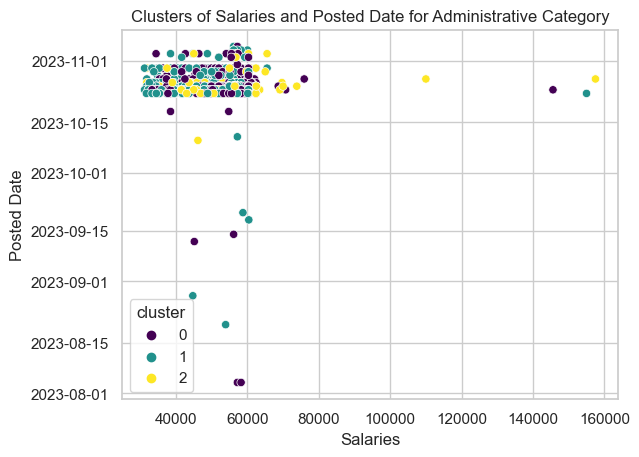

1    753
2    533
0    260
Name: cluster, dtype: int64


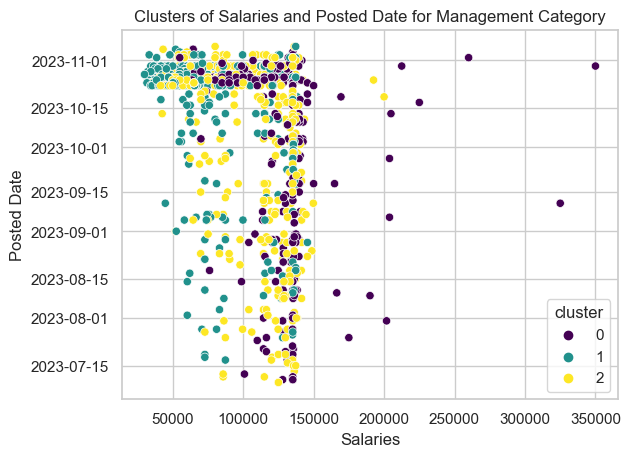

1    595
0    385
2    122
Name: cluster, dtype: int64


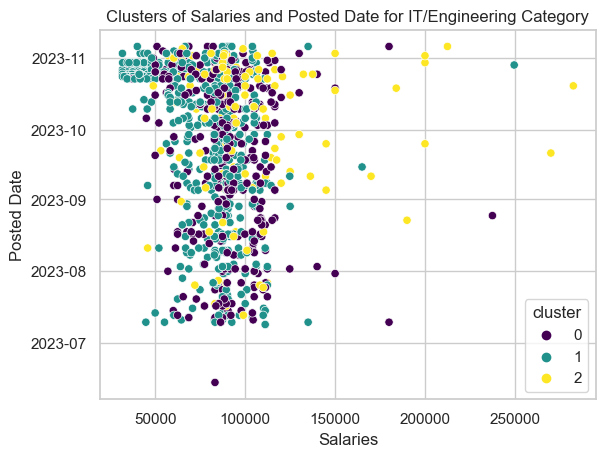

In [135]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a Clustering Analyzer Class
class ClusteringAnalyzer:
    def __init__(self, df, category_name, num_clusters_range):
        self.df = df
        self.category_name = category_name
        self.num_clusters_range = num_clusters_range

        # Creating a method to preprocess the columns in each category dataframe
    def preprocess_data(self):
        # Extracting features for clustering
        data_for_clustering = self.df[['Minimum Experience', 'Maximum Experience', 'posted date']]

        # Dropping rows with missing values if any
        data_for_clustering.dropna(inplace=True)

        # Standardizing the  numeric columns
        scaler = StandardScaler()
        numeric_columns_scaled = scaler.fit_transform(data_for_clustering[['Minimum Experience', 'Maximum Experience']])

        # Creating a month column by extracting information from 'posted date' column
        self.df['month'] = self.df['posted date'].dt.month

        # Encoding categorical columns
        encoder = OneHotEncoder(drop='first')
        # Converting lists in 'position' column to strings
        self.df['position'] = self.df['position'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
        categorical_columns_encoded = encoder.fit_transform(self.df[['position', 'company', 'location', 'Experience', 'category', 'City', 'Province', 'salaries']])

        # Combining all features into final df
        final_data = pd.concat([pd.DataFrame(numeric_columns_scaled, columns=['Minimum Experience', 'Maximum Experience']),
                               self.df[['month']],
                               pd.DataFrame(categorical_columns_encoded.toarray(),
                                            columns=encoder.get_feature_names_out(['position', 'company', 'location', 'Experience', 'category', 'City', 'Province', 'salaries']))],
                               axis=1)

        return final_data
    
    # Creating a method to apply elbow technique

    def elbow_method(self):
        distortions = []
        for num_clusters in self.num_clusters_range:
            kmeans = KMeans(n_clusters=num_clusters, random_state=42)
            kmeans.fit(self.preprocess_data())
            distortions.append(kmeans.inertia_)

        plt.plot(self.num_clusters_range, distortions, marker='o')
        plt.title(f'Elbow Method for {self.category_name} Category')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Distortion')
        plt.show()

        # Creating a method to apply silhoutte technique
    def silhouette_analysis(self):
        silhouette_scores = []
        for num_clusters in self.num_clusters_range:
            kmeans = KMeans(n_clusters=num_clusters, random_state=42)
            cluster_labels = kmeans.fit_predict(self.preprocess_data())
            silhouette_avg = silhouette_score(self.preprocess_data(), cluster_labels)
            silhouette_scores.append(silhouette_avg)

        plt.plot(self.num_clusters_range, silhouette_scores, marker='o')
        plt.title(f'Silhouette Analysis for {self.category_name} Category')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Silhouette Score')
        plt.show()
        
        # Evaluating the clustering

    def evaluate_clustering(self):
        # Evaluate clustering using silhouette score
        silhouette_avg = silhouette_score(self.final_data, self.df['cluster'])
        print(f"Silhouette Score for {self.category}: {silhouette_avg}")

        # Evaluate clustering using Calinski-Harabasz Index
        calinski_harabasz = calinski_harabasz_score(self.final_data, self.df['cluster'])
        print(f"Calinski-Harabasz Index for {self.category}: {calinski_harabasz}")

        # Evaluate clustering using Davies-Bouldin Index
        davies_bouldin = davies_bouldin_score(self.final_data, self.df['cluster'])
        print(f"Davies-Bouldin Index for {self.category}: {davies_bouldin}")

     # Method to perform clustering   
        
    def perform_clustering_and_plot(self, num_clusters):
        # Applying K-Means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        self.df['cluster'] = kmeans.fit_predict(self.preprocess_data())

        # Checking the distribution of data points in each cluster
        print(self.df['cluster'].value_counts())

        # Scatter plot of 'salaries' and 'posted date' colored by clusters
        sns.scatterplot(x='salaries', y='posted date', hue='cluster', data=self.df, palette='viridis')
        plt.title(f'Clusters of Salaries and Posted Date for {self.category_name} Category')
        plt.xlabel('Salaries')
        plt.ylabel('Posted Date')
        plt.show()

# Example Usage:
num_clusters_range = range(2, 10)  # Adjust the range as needed
admin_analyzer = ClusteringAnalyzer(admin_job_df.reset_index(drop=True), 'Administrative', num_clusters_range)

admin_analyzer.perform_clustering_and_plot(3)  # Choose an appropriate number of clusters


mgmt_analyzer = ClusteringAnalyzer(mgmt_job_df.reset_index(drop=True), 'Management', num_clusters_range)

mgmt_analyzer.perform_clustering_and_plot(3)  # Choose an appropriate number of clusters


it_analyzer = ClusteringAnalyzer(it_job_df.reset_index(drop=True), 'IT/Engineering', num_clusters_range)

it_analyzer.perform_clustering_and_plot(3)  # Choose an appropriate number of clusters


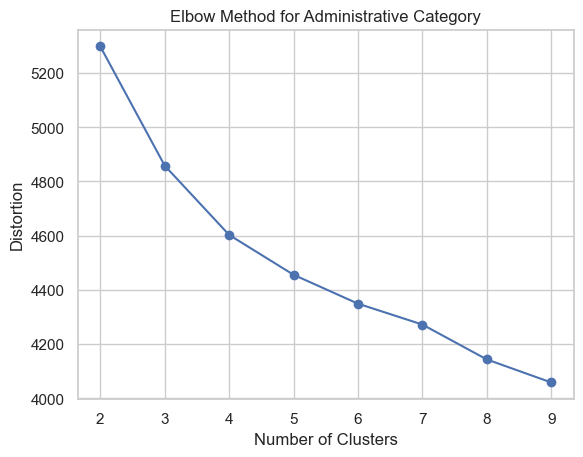

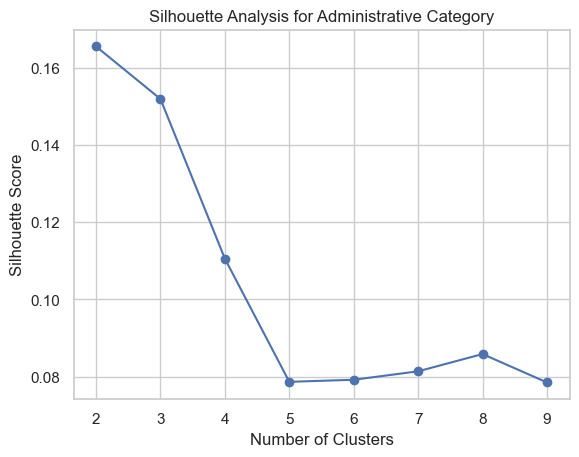

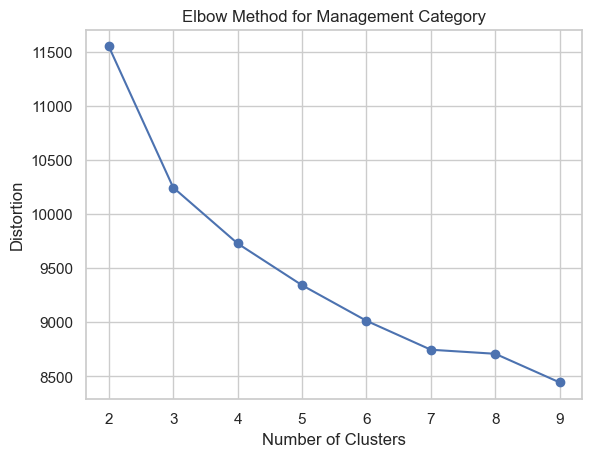

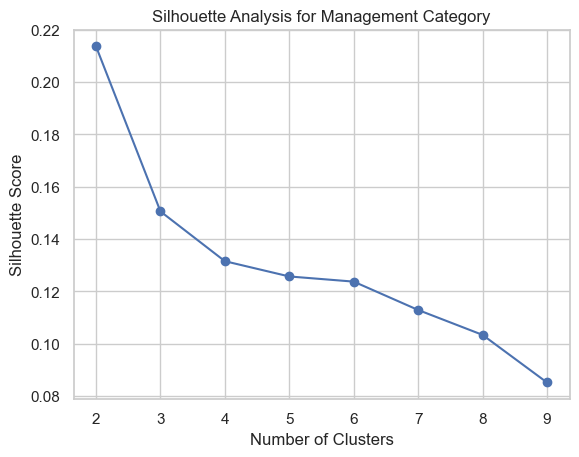

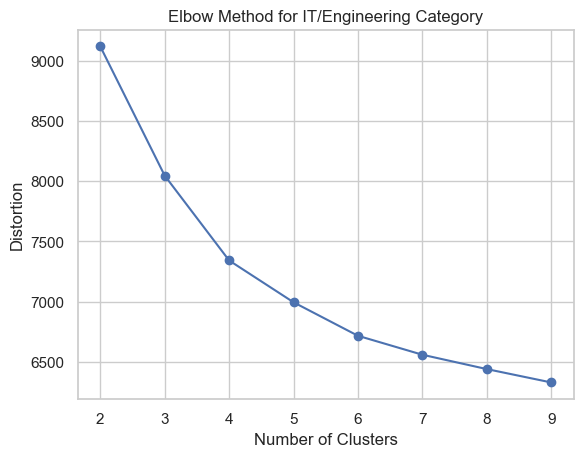

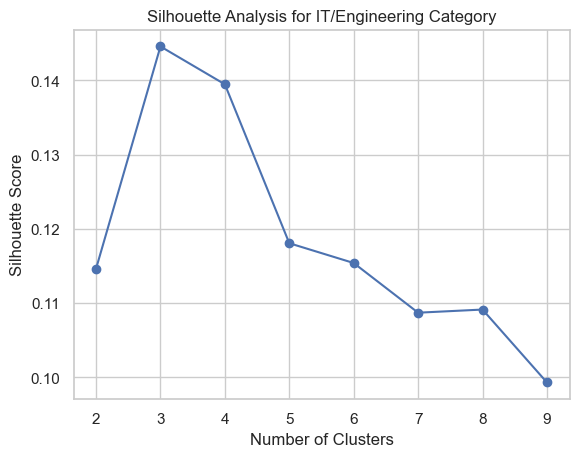

In [136]:
admin_analyzer.elbow_method()
admin_analyzer.silhouette_analysis()

mgmt_analyzer.elbow_method()
mgmt_analyzer.silhouette_analysis()

it_analyzer.elbow_method()
it_analyzer.silhouette_analysis()

### Conclusion drawn:
**Explanation for Elbow Curve**: Elbow curve is used to identify the appropriate number of clusters for the clustering problem.
The Elbow point on this curve is where the rate of decrease of inertia slows down.Inertia here is measure to see how spread out the points in the cluster are.It is sum of squared distances between each point and center of the assigned cluster.

**Explanation for Silhoutte Score**:It is a mesure of(how close the points in a cluster are to each other) and separation (how well-separated the clusters are from each other).

>Admistrative Category: Here we can see that after 5 rate of decrease of inertia slows down.In Silhoutte curve we see the peak point is achieved at 2.We will choose 2 as our number of clusters considering the nature of our dataset.

>Management Category: Here we select 6 clusters because we see a great dip in rate of decrease of inertia at 6. We are not using 2 considering the silhoutte technique because 2 clusters will not be enough to identify pattern in dataset considering the nature of our dataframe

>IT/Engeneering Category: Here we can see that after 4 rate of decrease of inertia slows down.In Silhoutte curve we see the peak point is achieved at 3.We will choose 4 as our number of clusters considering the nature of our dataset and achieving a balance between the two methods.

0    437
1    382
Name: cluster, dtype: int64


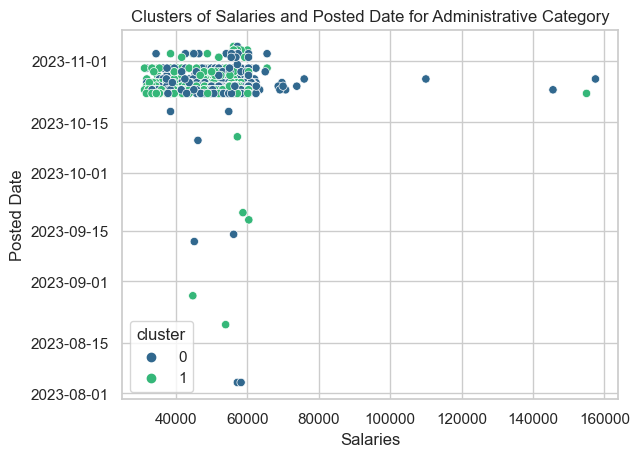

0    506
2    304
4    260
3    215
1    174
5     87
Name: cluster, dtype: int64


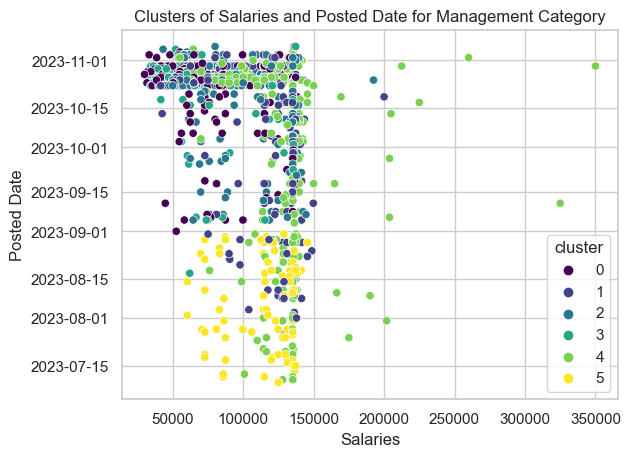

0    449
1    296
2    235
3    122
Name: cluster, dtype: int64


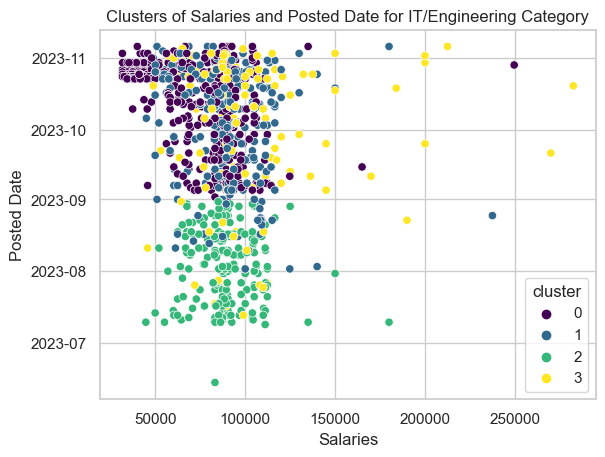

In [137]:
admin_analyzer.perform_clustering_and_plot(2)  # Choose an appropriate number of clusters
mgmt_analyzer.perform_clustering_and_plot(6)  # Choose an appropriate number of clusters
it_analyzer.perform_clustering_and_plot(4)  # Choose an appropriate number of clusters


### Conclusion after using elbow and silhoutte technique

**Administrative Category**: Before using ELbow and Silhoutte technique there were cluster overlapping.After using the techniques we lowered the number of clusters , still there is some overlapping.

**Management Category**: Before using ELbow and Silhoutte technique there were cluster overlapping and no clear pattern was seen. After using the techniques we increased the number of clusters to 6 and there was seperation among clusters.


**IT Category**: Prior to applying the Elbow and Silhouette techniques, the clustering results exhibited cluster overlapping and lacked a discernible pattern.This adjustment resulted in enhanced separation among clusters, providing a more distinct and meaningful clustering structure. 



> **Conclusion** :The techniques played a crucial role in optimizing the clustering solution, contributing to improved clarity and interpretation of the data patterns.

In [138]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


## Generating report using pandas profiling

In [139]:
from pandas_profiling import ProfileReport


In [140]:
profile = ProfileReport(combined_job_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]